## Real Estate Capstone Project

The task here is to make predictions of rental price and area.
Use appropriate models on their label basis. 
Remember you need to make 2 different predictions: rental price and area.
    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Data Collection

In [2]:
table1_df1 = pd.read_csv('Table1.csv')
table2_df2 = pd.read_csv('Table2.csv')
table3_df3 = pd.read_csv('Table3.csv')

Observation: 
            1. RealEstate data webscraped using selenium from different websites - 5298 samples 
                scraped and stored in the format of csv file and stored in local drive. 

## End of Data Collection

## Exploratory Data Analysis

In [ ]:
# Now make only 1 dataframe of 3 csv files using concat/merge /join operation of pandas and 
# start doing EDA.

In [3]:
merged_df1 = pd.merge(table1_df1, table2_df2, on = 'Sno')

In [4]:
RealEstate_df = pd.merge(merged_df1, table3_df3, on = 'Sno')

In [5]:
RealEstate_df

,Sno,Address,City,State code,Country,Rental Price,Deposit $,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,"8200-8220 Research Blvd, Austin, TX 78758",Austin,TX 78758,USA,170812,500,41560,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,2,"4900 E Oltorf St, Austin, TX 78741",Austin,TX 78741,USA,182199,None,None,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,3,"10500 S IH 35 Frontage Rd, Austin, TX 78748",Austin,TX 78748,USA,275210,None,None,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,4,"110 Jacob Fontaine Lane, Austin, TX 78752",Austin,TX 78752,USA,450095,None,None,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,5,"8300 Bluff Springs Rd, Austin, TX 78744",Austin,TX 78744,USA,423496,None,None,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,5294,"230 N 6th St, Richmond, VA 23219",Richmond,VA 23219,USA,241464,1475,122602,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
5294,5295,"3113 W Marshall St, Richmond, VA 23230",Richmond,VA 23230,USA,182365,1608,133656.96,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5295,5296,"520 W Franklin St, Richmond, VA 23220",Richmond,VA 23220,USA,185358,1025,85198,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
5296,5297,"9318 Tarheel Ter, Richmond, VA 23228",Richmond,VA 23228,USA,168650,1329,110466.48,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


Observation: 
            1. Predict the 'Rental Price' is a continous data 
            2. This is a Regression problem. 
            3. The target label is 'Rental Price' 

In [6]:
RealEstate_df.head()

,Sno,Address,City,State code,Country,Rental Price,Deposit $,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,"8200-8220 Research Blvd, Austin, TX 78758",Austin,TX 78758,USA,170812,500,41560,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,2,"4900 E Oltorf St, Austin, TX 78741",Austin,TX 78741,USA,182199,None,None,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,3,"10500 S IH 35 Frontage Rd, Austin, TX 78748",Austin,TX 78748,USA,275210,None,None,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,4,"110 Jacob Fontaine Lane, Austin, TX 78752",Austin,TX 78752,USA,450095,None,None,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,5,"8300 Bluff Springs Rd, Austin, TX 78744",Austin,TX 78744,USA,423496,None,None,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


Observation: 
            1. Displayed first five rows of the dataframe

In [7]:
RealEstate_df.tail()

,Sno,Address,City,State code,Country,Rental Price,Deposit $,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
5293,5294,"230 N 6th St, Richmond, VA 23219",Richmond,VA 23219,USA,241464,1475,122602,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
5294,5295,"3113 W Marshall St, Richmond, VA 23230",Richmond,VA 23230,USA,182365,1608,133656.96,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5295,5296,"520 W Franklin St, Richmond, VA 23220",Richmond,VA 23220,USA,185358,1025,85198,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
5296,5297,"9318 Tarheel Ter, Richmond, VA 23228",Richmond,VA 23228,USA,168650,1329,110466.48,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5297,5298,"1501 Boulder Springs Ter, North Chesterfield, ...",Richmond,VA 23225,USA,159341,1573,130747.76,2,2,1156,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed


Observation: 
            1. Displayed last five rows of the dataframe.

In [8]:
RealEstate_df.shape

(5298, 20)

Observation: 
            1. Dataset has 5298 rows and 20 columns

In [9]:
RealEstate_df.dtypes

Sno                 int64
Address            object
City               object
State code         object
Country            object
Rental Price        int64
Deposit $          object
Deposit            object
no of bed           int64
no of bathroom      int64
Area                int64
Pets Allowed       object
Washer/Dryer       object
Air Conditioner    object
Parking            object
Fireplace          object
Dishwasher         object
Hardwood floors    object
Roofdeck           object
Storage            object
dtype: object

Observation: 
            1. Data types of the columns - Sno, Rental Price, no of bed, no of bathroom, Area are int 
               and rest all columns are Object type

In [11]:
RealEstate_df.nunique()

Sno                5298
Address            5016
City                 23
State code         1159
Country               1
Rental Price       2462
Deposit $          1499
Deposit            1499
no of bed            10
no of bathroom        7
Area               1406
Pets Allowed          2
Washer/Dryer          2
Air Conditioner       2
Parking               2
Fireplace             2
Dishwasher            2
Hardwood floors       2
Roofdeck              2
Storage               2
dtype: int64

Observation: 
            1. Unique values in each column

In [12]:
RealEstate_df.columns

Index(['Sno', 'Address', 'City', 'State code', 'Country', 'Rental Price',
       'Deposit $', 'Deposit ', 'no of bed', 'no of bathroom', 'Area',
       'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

Observation: 
            1. Column names are listed.

In [13]:
# check the value counts of each column

for i in RealEstate_df.columns:
    print(RealEstate_df[i].value_counts())
    print('\n')

1       1
3539    1
3537    1
3536    1
3535    1
       ..
1766    1
1765    1
1764    1
1763    1
5298    1
Name: Sno, Length: 5298, dtype: int64


Buffalo, NY                                               125
88 Leonard St, New York, NY 10013                           4
11 Great Gorge Dr Unit 8, Vernon, NJ 07462                  3
930 Figueroa Ter, Los Angeles, CA 90012                     3
18425 Malden St, Los Angeles, CA 91325                      2
                                                         ... 
3900 Dalecrest Dr, Las Vegas, NV 89129                      1
2405-2475 W Serene Ave, Las Vegas, NV 89123                 1
9501 W Sahara Ave, Las Vegas, NV 89117                      1
5540 W Harmon Ave, Las Vegas, NV 89103                      1
1501 Boulder Springs Ter, North Chesterfield, VA 23225      1
Name: Address, Length: 5016, dtype: int64


 Los Angeles     466
Jersey City      455
 New York        455
 Houston         424
 Atlanta         291
 Charlotte       26

Observation:
            1. Unique values of each features are observed

## Data Cleaning

In [14]:
RealEstate_df.shape

(5298, 20)

In [15]:
RealEstate_df.columns

Index(['Sno', 'Address', 'City', 'State code', 'Country', 'Rental Price',
       'Deposit $', 'Deposit ', 'no of bed', 'no of bathroom', 'Area',
       'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

## Drop Columns not needed

In [16]:
# Drop Columns - 'Sno', 'Address', 'State code', 'Country', 'Deposit $' not needed 
# for the prediction of 'Rental Price' or 'Area'

RealEstate_df.drop(['Sno', 'Address', 'State code', 'Country', 'Deposit $'], axis = 1, inplace = True)

In [17]:
RealEstate_df.shape

(5298, 15)

## Check for Null values

In [18]:
RealEstate_df.isna().sum()

City               0
Rental Price       0
Deposit            0
no of bed          0
no of bathroom     0
Area               0
Pets Allowed       0
Washer/Dryer       0
Air Conditioner    0
Parking            0
Fireplace          0
Dishwasher         0
Hardwood floors    0
Roofdeck           0
Storage            0
dtype: int64

<AxesSubplot:>

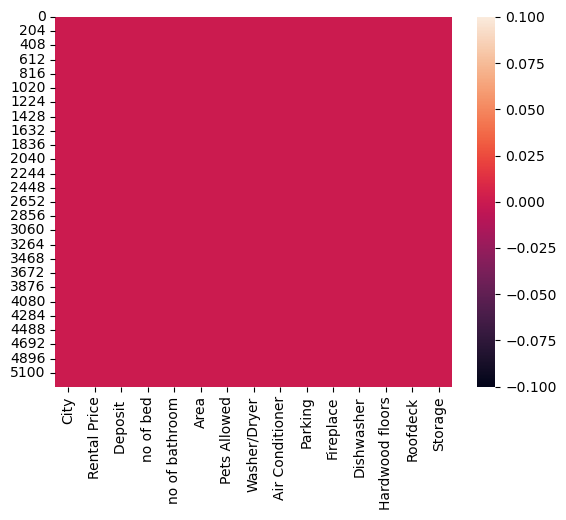

In [19]:
sns.heatmap(RealEstate_df.isnull())  # color same so no null values

Observation: 
            1. There are no Null values

In [20]:
RealEstate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5297
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             5298 non-null   object
 1   Rental Price     5298 non-null   int64 
 2   Deposit          5298 non-null   object
 3   no of bed        5298 non-null   int64 
 4   no of bathroom   5298 non-null   int64 
 5   Area             5298 non-null   int64 
 6   Pets Allowed     5298 non-null   object
 7   Washer/Dryer     5298 non-null   object
 8   Air Conditioner  5298 non-null   object
 9   Parking          5298 non-null   object
 10  Fireplace        5298 non-null   object
 11  Dishwasher       5298 non-null   object
 12  Hardwood floors  5298 non-null   object
 13  Roofdeck         5298 non-null   object
 14  Storage          5298 non-null   object
dtypes: int64(4), object(11)
memory usage: 662.2+ KB


Observation: 
            1. There are no Null values in all 5298 rows

## Check for the duplicate values

In [21]:
RealEstate_df.shape

(5298, 15)

In [22]:
RealEstate_df.duplicated().sum()

7

Observation: 
            1. There are 7 duplicate values in all 5298 rows

In [23]:
# remove 7 duplicate values in rows

RealEstate_df.drop_duplicates(ignore_index = True, inplace = True)

In [24]:
RealEstate_df.shape

(5291, 15)

In [25]:
RealEstate_df.duplicated().sum()

0

Observation: 
            1. duplicate values are handled

## Check for the Inconsistent values - 'no of bed' column 

In [26]:
RealEstate_df.shape

(5291, 15)

In [27]:
RealEstate_df['no of bed'].value_counts()

2     2324
3     2270
1      433
4      219
5       34
6        4
7        4
8        1
9        1
17       1
Name: no of bed, dtype: int64

In [28]:
RealEstate_df.dtypes

City               object
Rental Price        int64
Deposit            object
no of bed           int64
no of bathroom      int64
Area                int64
Pets Allowed       object
Washer/Dryer       object
Air Conditioner    object
Parking            object
Fireplace          object
Dishwasher         object
Hardwood floors    object
Roofdeck           object
Storage            object
dtype: object

Observation: 
            1. There are no inconsistent values - no of bed

## Check for the Inconsistent values - 'no of bathroom' column 

In [29]:
RealEstate_df.shape

(5291, 15)

In [30]:
RealEstate_df['no of bathroom'].value_counts()

2    3633
1    1074
3     503
4      67
5      10
7       2
9       2
Name: no of bathroom, dtype: int64

In [31]:
RealEstate_df.shape

(5291, 15)

Observation: 
            1. There are no inconsistent values - no of bed

## Check for the 'None' values 

In [32]:
RealEstate_df.isin(['None']).sum()

City                  0
Rental Price          0
Deposit            1206
no of bed             0
no of bathroom        0
Area                  0
Pets Allowed          0
Washer/Dryer          0
Air Conditioner       0
Parking               0
Fireplace             0
Dishwasher            0
Hardwood floors       0
Roofdeck              0
Storage               0
dtype: int64

Observation: 
            1. Deposit field have 'None' values
            2. Handle these 'None' values

In [33]:
RealEstate_df.loc[RealEstate_df['Deposit '] == 'None']

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
1,Austin,182199,None,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,None,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,None,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,None,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5,Austin,768029,None,2,2,1397,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,Indianapolis,232653,None,2,1,1300,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
5099,Miami,274047,None,2,2,1264,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5130,Miami,343452,None,3,2,1349,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5145,Miami,343452,None,3,2,2126,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


Observation: 
            1. There are 'None' values in the 'Deposit' column

In [34]:
RealEstate_df.dtypes

City               object
Rental Price        int64
Deposit            object
no of bed           int64
no of bathroom      int64
Area                int64
Pets Allowed       object
Washer/Dryer       object
Air Conditioner    object
Parking            object
Fireplace          object
Dishwasher         object
Hardwood floors    object
Roofdeck           object
Storage            object
dtype: object

## Handle the 'None' values 

In [35]:
RealEstate_df.columns

Index(['City', 'Rental Price', 'Deposit ', 'no of bed', 'no of bathroom',
       'Area', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

In [36]:
for i in ['Deposit ']:
    RealEstate_df[i] = RealEstate_df[i].replace('None', np.nan)

In [37]:
RealEstate_df.loc[RealEstate_df['Deposit '] == 'None']

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage


In [38]:
RealEstate_df.isin(['None']).sum()

City               0
Rental Price       0
Deposit            0
no of bed          0
no of bathroom     0
Area               0
Pets Allowed       0
Washer/Dryer       0
Air Conditioner    0
Parking            0
Fireplace          0
Dishwasher         0
Hardwood floors    0
Roofdeck           0
Storage            0
dtype: int64

Observation: 
            1. Handled 'None' values for 1 field and no 'None' values now
            2. All 'None' values are replaced to Null values

## Check for the Null values

In [39]:
RealEstate_df.isnull().sum() 

City                  0
Rental Price          0
Deposit            1206
no of bed             0
no of bathroom        0
Area                  0
Pets Allowed          0
Washer/Dryer          0
Air Conditioner       0
Parking               0
Fireplace             0
Dishwasher            0
Hardwood floors       0
Roofdeck              0
Storage               0
dtype: int64

<AxesSubplot:>

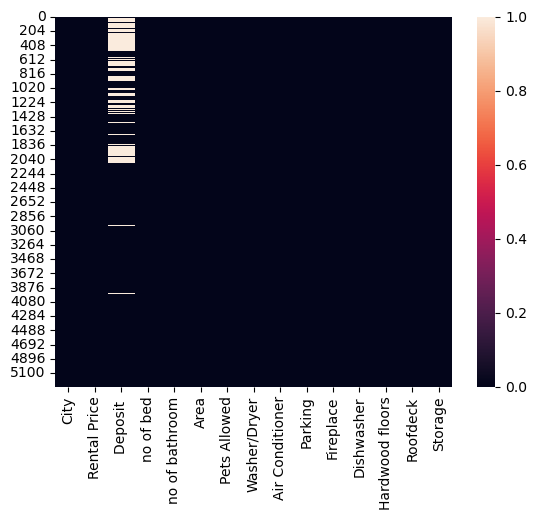

In [40]:
sns.heatmap(RealEstate_df.isnull())  # color same so no null values

Observation: 
            1. 'None' values are replaced to Null values.
            2. Now handle Null values

## Handle the Null values

In [41]:
RealEstate_df.dtypes

City               object
Rental Price        int64
Deposit            object
no of bed           int64
no of bathroom      int64
Area                int64
Pets Allowed       object
Washer/Dryer       object
Air Conditioner    object
Parking            object
Fireplace          object
Dishwasher         object
Hardwood floors    object
Roofdeck           object
Storage            object
dtype: object

In [42]:
RealEstate_df['Deposit '] = pd.to_numeric(RealEstate_df['Deposit '], errors = 'coerce')

Observation: 
            1. Converted the object column to numeric data type

In [43]:
RealEstate_df.dtypes

City                object
Rental Price         int64
Deposit            float64
no of bed            int64
no of bathroom       int64
Area                 int64
Pets Allowed        object
Washer/Dryer        object
Air Conditioner     object
Parking             object
Fireplace           object
Dishwasher          object
Hardwood floors     object
Roofdeck            object
Storage             object
dtype: object

In [44]:
RealEstate_df.isnull().sum() 

City                  0
Rental Price          0
Deposit            1206
no of bed             0
no of bathroom        0
Area                  0
Pets Allowed          0
Washer/Dryer          0
Air Conditioner       0
Parking               0
Fireplace             0
Dishwasher            0
Hardwood floors       0
Roofdeck              0
Storage               0
dtype: int64

Observation: 
            1. As usual Impute the input feature which has Null values.

In [45]:
RealEstate_df.shape

(5291, 15)

In [46]:
# Handle all features Null values - float type

for i in ['Deposit ']:
        RealEstate_df[i] = RealEstate_df[i].fillna(RealEstate_df[i].mean())

In [47]:
RealEstate_df.isnull().sum() 

City               0
Rental Price       0
Deposit            0
no of bed          0
no of bathroom     0
Area               0
Pets Allowed       0
Washer/Dryer       0
Air Conditioner    0
Parking            0
Fireplace          0
Dishwasher         0
Hardwood floors    0
Roofdeck           0
Storage            0
dtype: int64

<AxesSubplot:>

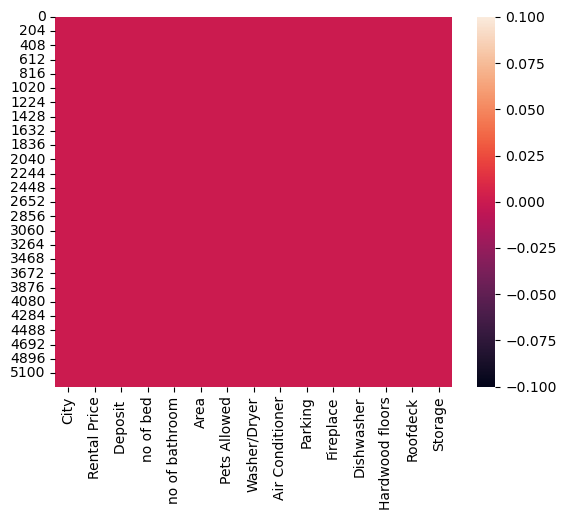

In [48]:
sns.heatmap(RealEstate_df.isnull())  # color same so no null values

Observation: 
            1. Removed all input features Null values - now no Null values

In [49]:
RealEstate_df.shape

(5291, 15)

In [50]:
RealEstate_df.describe()

,Rental Price,Deposit,no of bed,no of bathroom,Area
count,5.291000e+03,5.291000e+03,5291.000000,5291.000000,5291.000000
mean,2.861694e+05,1.425370e+05,2.461349,1.927613,1361.572671
std,3.182716e+05,1.375340e+05,0.781744,0.623314,791.942793
min,3.516000e+04,8.312000e+01,1.000000,1.000000,73.000000
25%,1.620840e+05,1.021545e+05,2.000000,2.000000,1063.000000
50%,2.240920e+05,1.393922e+05,2.000000,2.000000,1288.000000
75%,3.179340e+05,1.453353e+05,3.000000,2.000000,1500.000000
max,1.246800e+07,8.312000e+06,17.000000,9.000000,40292.000000


Observation: 
            1. There are No Null values.
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [51]:
RealEstate_df.head()

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


In [52]:
RealEstate_df.columns

Index(['City', 'Rental Price', 'Deposit ', 'no of bed', 'no of bathroom',
       'Area', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

In [53]:
# seperating numerical and categorical columns

cat_col = []
for i in RealEstate_df.dtypes.index:
    if RealEstate_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in RealEstate_df.dtypes.index:
    if RealEstate_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['City', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking', 'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage']


Numerical Column ['Rental Price', 'Deposit ', 'no of bed', 'no of bathroom', 'Area']


## Check for the Outliers

In [54]:
RealEstate_df_features = RealEstate_df.drop(['City', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking', 'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'], axis = 1)

In [55]:
RealEstate_df_features.head()

,Rental Price,Deposit,no of bed,no of bathroom,Area
0,170812,41560.000000,3,2,1428
1,182199,142537.024666,3,2,1386
2,275210,142537.024666,2,2,1216
3,450095,142537.024666,2,2,1256
4,423496,142537.024666,2,2,1142


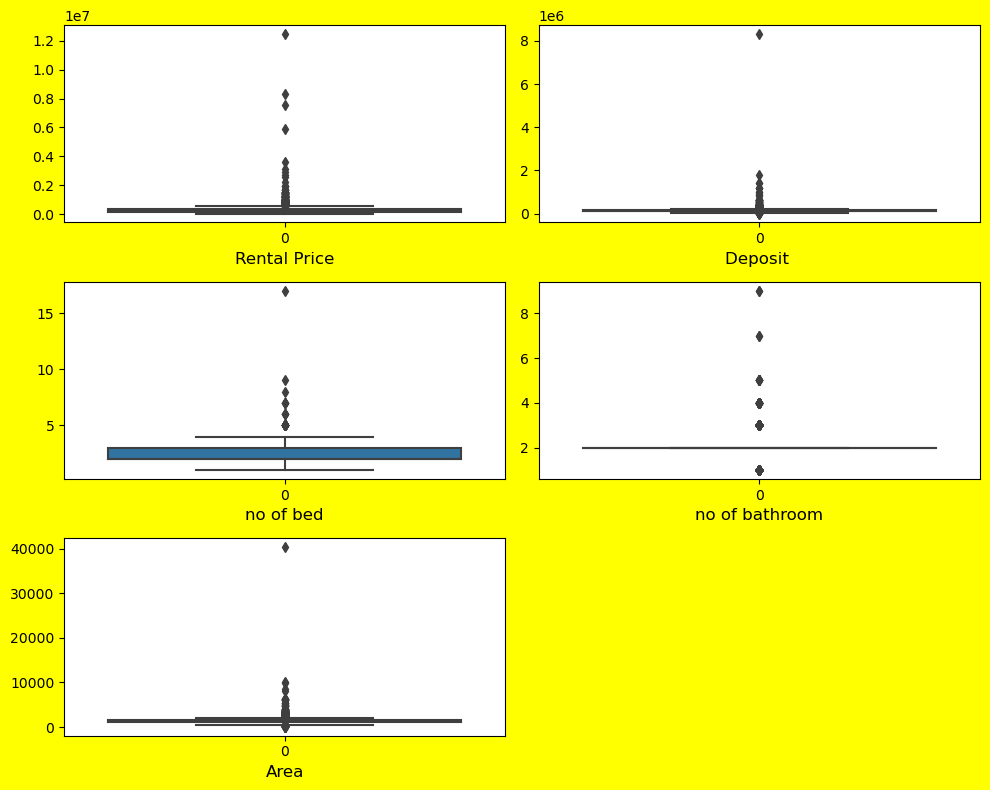

In [56]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,8), facecolor = 'yellow')
p = 1
for i in RealEstate_df_features:
    if p <= 5:
        ax = plt.subplot(3, 2, p)
        sns.boxplot(data = RealEstate_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations: 
            1. More Outliers present in all the features. 
            2. Outliers are left skewed (i.e. outliers are above max value) 
            3. Remove the outliers

## Find IQR to identify outliers and remove it

In [57]:
# there are situation we should remove outliers 

q1 = RealEstate_df.quantile(0.25)
q3 = RealEstate_df.quantile(0.75)
iqr = q3 - q1

In [58]:
# validating one outlier - Deposit

deposit_high = (q3['Deposit '] + (1.5 * iqr['Deposit ']))
deposit_high

# anything > 2465.0 outliers

210106.58000000002

In [59]:
# check the index which have the higher values

np_index = np.where(RealEstate_df['Deposit '] > deposit_high)
np_index

# remove these indexes as they are outliers

(array([ 488,  492,  493,  494,  495,  507,  510,  511,  519,  520,  523,
         524,  536,  544,  546,  550,  555,  579,  590,  591,  593,  594,
         599,  600,  602,  606,  615,  621,  624,  642,  646,  649,  651,
         662,  685,  687,  689,  690,  727,  731,  736,  739,  743,  749,
         753,  770,  774,  783,  788,  842,  876,  888,  890,  896,  900,
         908,  912,  914,  924,  932,  937,  940,  949,  951,  954,  955,
         958,  959,  961,  968,  970,  971,  980,  982,  983,  985,  986,
         989,  991,  992,  993, 1005, 1010, 1011, 1015, 1021, 1030, 1042,
        1045, 1056, 1057, 1058, 1064, 1067, 1081, 1101, 1102, 1103, 1111,
        1120, 1121, 1131, 1132, 1139, 1153, 1154, 1160, 1166, 1169, 1173,
        1184, 1207, 1213, 1217, 1235, 1263, 1298, 1302, 1306, 1317, 1318,
        1323, 1326, 1328, 1366, 1373, 1385, 1397, 1399, 1401, 1403, 1407,
        1409, 1410, 1412, 1413, 1415, 1416, 1417, 1419, 1420, 1421, 1422,
        1423, 1424, 1426, 1427, 1428, 

In [60]:
RealEstate_df.shape

(5291, 15)

In [61]:
RealEstate_df = RealEstate_df.drop(RealEstate_df.index[np_index])

In [62]:
RealEstate_df.shape

(4780, 15)

In [63]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
5287,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
5288,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
5289,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


In [64]:
RealEstate_df.reset_index(inplace = True, drop = True)

In [65]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
4776,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4777,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
4778,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


Observations: 
            1. 511 Outliers removed through the "Deposit " column
            2. now we have 4780 samples and 15 columns

In [66]:
RealEstate_df.dtypes

City                object
Rental Price         int64
Deposit            float64
no of bed            int64
no of bathroom       int64
Area                 int64
Pets Allowed        object
Washer/Dryer        object
Air Conditioner     object
Parking             object
Fireplace           object
Dishwasher          object
Hardwood floors     object
Roofdeck            object
Storage             object
dtype: object

In [67]:
# validating another outlier - no of bed

bed_high = (q3['no of bed'] + (1.5 * iqr['no of bed']))
bed_high

# anything > 4.5 outliers

4.5

In [68]:
# check the index which have the higher values

np_index1 = np.where(RealEstate_df['no of bed'] > bed_high)
np_index1

# remove these indexes as they are outliers

(array([ 149,  217,  299,  300,  306,  327,  365,  420,  446,  797,  850,
         865, 1039, 1074, 1120, 1131, 1140, 1287, 1346, 1384, 1389, 1391,
        1435, 1779, 2360, 2429, 2562, 2642, 2810, 3144, 3548, 4307, 4317,
        4513, 4579, 4596, 4668], dtype=int64),)

In [69]:
RealEstate_df.shape

(4780, 15)

In [70]:
RealEstate_df = RealEstate_df.drop(RealEstate_df.index[np_index1])

In [71]:
RealEstate_df.shape

(4743, 15)

In [72]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
4776,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4777,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
4778,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


In [73]:
RealEstate_df.reset_index(inplace = True, drop = True)

In [74]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
4739,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4740,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
4741,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


In [75]:
RealEstate_df.shape

(4743, 15)

In [76]:
# validating another outlier - Rental Price

price_high = (q3['Rental Price'] + (1.5 * iqr['Rental Price']))
price_high

# anything > 551709.0 outliers

551709.0

In [77]:
# check the index which have the higher values

np_index2 = np.where(RealEstate_df['Rental Price'] > price_high)
np_index2

# remove these indexes as they are outliers

(array([   5,    8,   59,   62,   63,   74,   85,   88,   93,  136,  142,
         144,  151,  152,  153,  178,  211,  221,  223,  236,  271,  279,
         284,  312,  316,  318,  330,  346,  361,  362,  368,  374,  375,
         390,  391,  407,  409,  419,  426,  428,  440,  441,  443,  444,
         445,  448,  470,  514,  536,  540,  543,  544,  546,  619,  676,
         689,  693,  710,  729,  771,  792,  796,  810,  832,  835, 1255,
        1437, 1613, 1624, 1626, 1667, 1680, 1683, 1684, 1685, 1686, 1687,
        1692, 1694, 1701, 1703, 1705, 1710, 1716, 1726, 1730, 1732, 1734,
        1736, 1737, 1740, 1743, 1750, 1754, 1761, 1762, 1767, 1771, 1778,
        1801, 1833, 1848, 1854, 1875, 1904, 1924, 1936, 1957, 1967, 1974,
        1975, 1977, 1979, 1990, 1996, 2035, 2054, 2076, 2079, 2096, 2109,
        2110, 2200, 2201, 2203, 2214, 2236, 2242, 2252, 2255, 2271, 2282,
        2320, 2352, 2366, 2371, 2408, 2491, 2709, 2711, 2738, 2796, 2801,
        2808, 2809, 2815, 2845, 2851, 

In [78]:
RealEstate_df.shape

(4743, 15)

In [79]:
RealEstate_df = RealEstate_df.drop(RealEstate_df.index[np_index2])

In [80]:
RealEstate_df.shape

(4470, 15)

In [81]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
4739,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4740,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
4741,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


In [82]:
RealEstate_df.reset_index(inplace = True, drop = True)

In [83]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,Austin,170812,41560.000000,3,2,1428,Allowed,Allowed,Allowed,Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed,Not Allowed
1,Austin,182199,142537.024666,3,2,1386,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed
2,Austin,275210,142537.024666,2,2,1216,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
3,Austin,450095,142537.024666,2,2,1256,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4,Austin,423496,142537.024666,2,2,1142,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,Richmond,241464,122602.000000,2,2,1269,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Allowed
4466,Richmond,182365,133656.960000,2,2,1091,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed
4467,Richmond,185358,85198.000000,3,2,1390,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Allowed,Not Allowed,Not Allowed
4468,Richmond,168650,110466.480000,3,2,1230,Allowed,Allowed,Allowed,Allowed,Not Allowed,Allowed,Not Allowed,Not Allowed,Allowed


## End of Data Cleaning

## Data Visualization

In [84]:
RealEstate_df.columns

Index(['City', 'Rental Price', 'Deposit ', 'no of bed', 'no of bathroom',
       'Area', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

## For Categorical Data Plotting

In [85]:
cat_col

['City',
 'Pets Allowed',
 'Washer/Dryer',
 'Air Conditioner',
 'Parking',
 'Fireplace',
 'Dishwasher',
 'Hardwood floors',
 'Roofdeck',
 'Storage']

Allowed        3835
Not Allowed     635
Name: Pets Allowed, dtype: int64


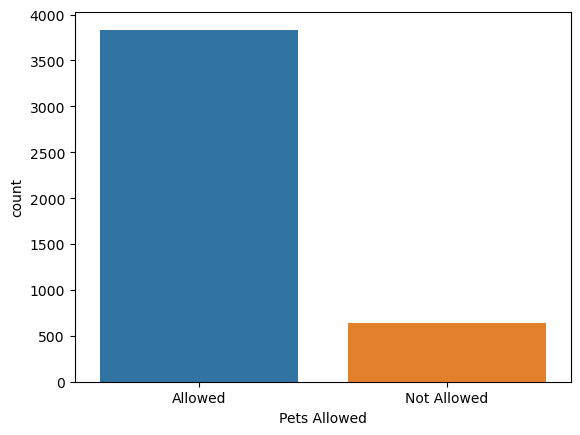

In [86]:
# Univariate Analysis

sns.countplot(x = 'Pets Allowed', data = RealEstate_df)
print(RealEstate_df['Pets Allowed'].value_counts())

Observation: 
            1. Pets allowed - 3835

Allowed        3781
Not Allowed     689
Name: Washer/Dryer, dtype: int64


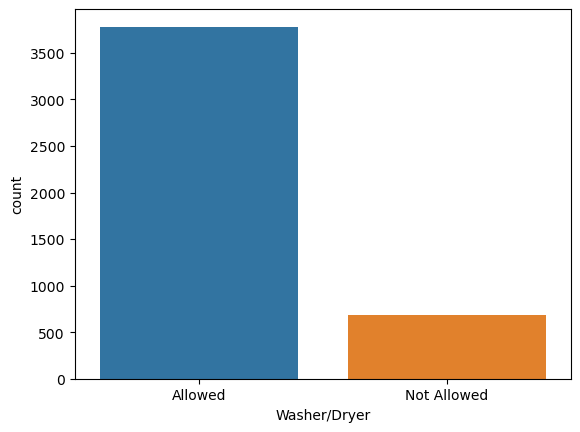

In [87]:
# Univariate Analysis

sns.countplot(x = 'Washer/Dryer', data = RealEstate_df)
print(RealEstate_df['Washer/Dryer'].value_counts())

Observation: 
            1. Washer/Dryer allowed - 3781

Allowed        4089
Not Allowed     381
Name: Air Conditioner, dtype: int64


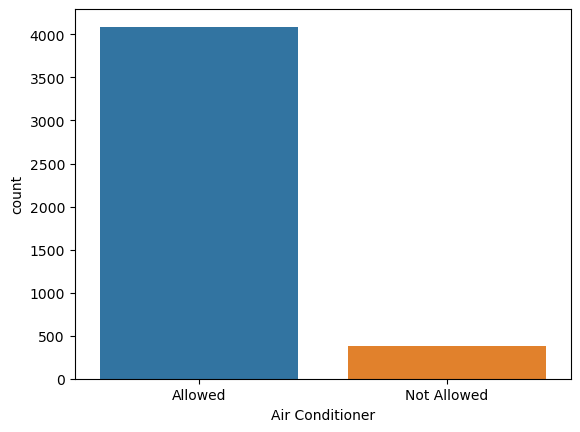

In [88]:
# Univariate Analysis

sns.countplot(x = 'Air Conditioner', data = RealEstate_df)
print(RealEstate_df['Air Conditioner'].value_counts())

Observation: 
            1. Air Conditioner allowed - 4089

Allowed        3613
Not Allowed     857
Name: Parking, dtype: int64


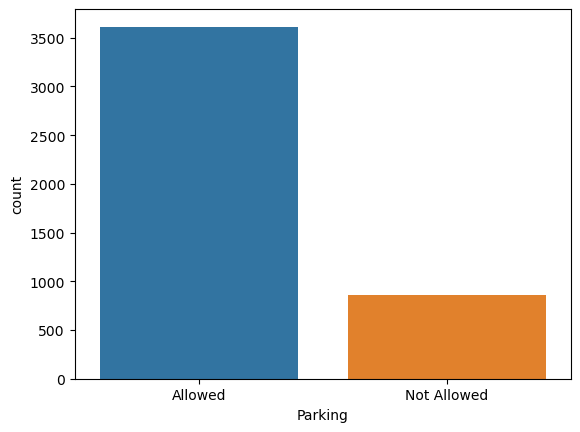

In [89]:
# Univariate Analysis

sns.countplot(x = 'Parking', data = RealEstate_df)
print(RealEstate_df['Parking'].value_counts())

Observation: 
            1. Parking allowed - 3613

Not Allowed    3399
Allowed        1071
Name: Fireplace, dtype: int64


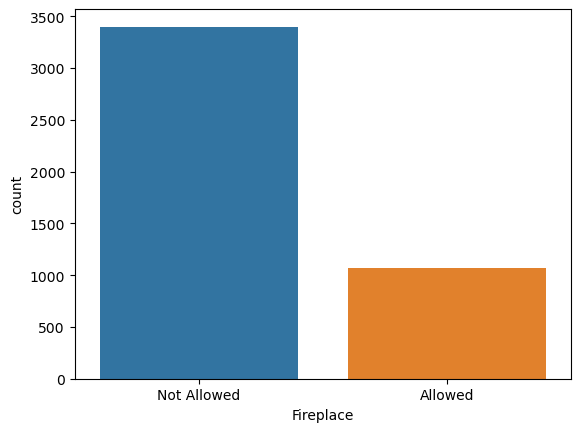

In [90]:
# Univariate Analysis

sns.countplot(x = 'Fireplace', data = RealEstate_df)
print(RealEstate_df['Fireplace'].value_counts())

Observation: 
            1. Fireplace not allowed - 3399

Allowed        3256
Not Allowed    1214
Name: Dishwasher, dtype: int64


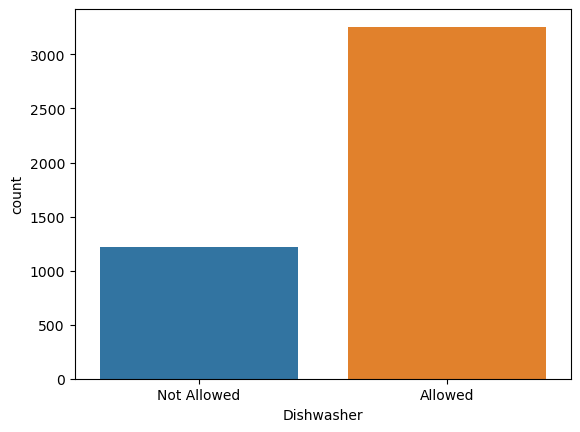

In [91]:
# Univariate Analysis

sns.countplot(x = 'Dishwasher', data = RealEstate_df)
print(RealEstate_df['Dishwasher'].value_counts())

Observation: 
            1. Dishwasher allowed - 3256

Not Allowed    3004
Allowed        1466
Name: Hardwood floors, dtype: int64


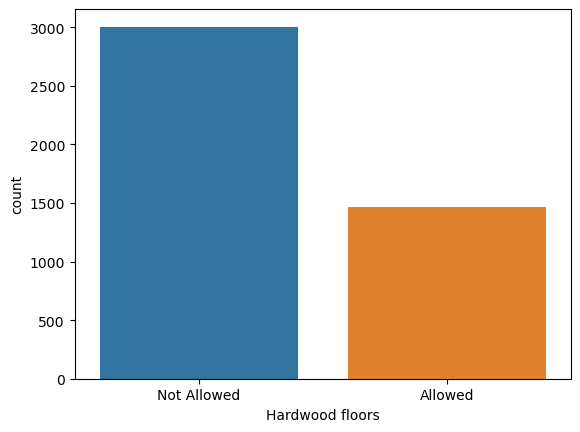

In [92]:
# Univariate Analysis

sns.countplot(x = 'Hardwood floors', data = RealEstate_df)
print(RealEstate_df['Hardwood floors'].value_counts())

Observation: 
            1. Hardwood floors not allowed - 3004

Not Allowed    4431
Allowed          39
Name: Roofdeck, dtype: int64


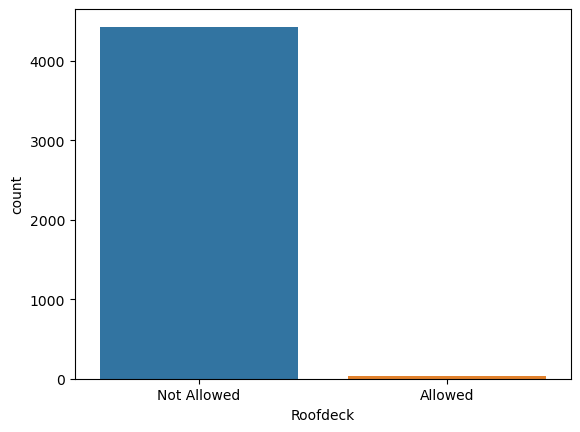

In [93]:
# Univariate Analysis

sns.countplot(x = 'Roofdeck', data = RealEstate_df)
print(RealEstate_df['Roofdeck'].value_counts())

Observation: 
            1. Roofdeck not allowed - 4431

Allowed        3363
Not Allowed    1107
Name: Storage, dtype: int64


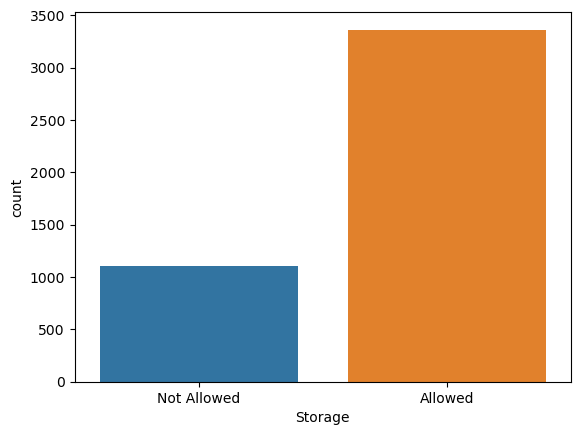

In [94]:
# Univariate Analysis

sns.countplot(x = 'Storage', data = RealEstate_df)
print(RealEstate_df['Storage'].value_counts())

Observation: 
            1. Storage allowed - 3363

<AxesSubplot:xlabel='Storage', ylabel='count'>

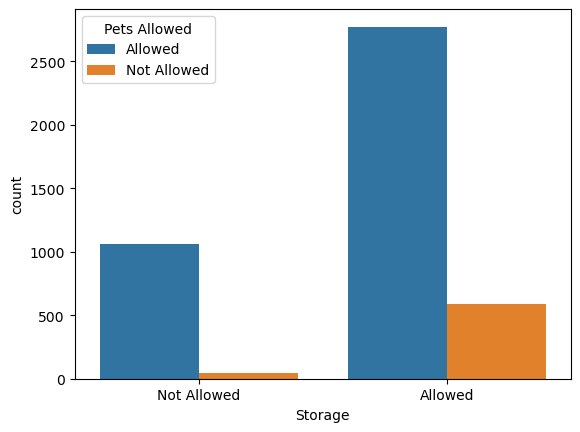

In [95]:
# Univariate Analysis

sns.countplot(x = 'Storage', data = RealEstate_df, hue = 'Pets Allowed')

Observation: 
            1. When Storage available is more and Pets are allowed

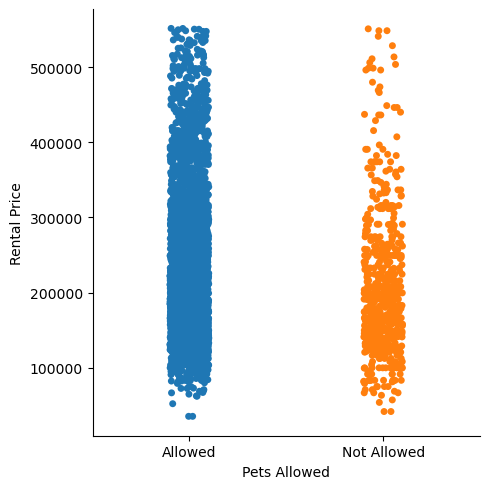

In [96]:
sns.catplot(x = 'Pets Allowed', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. more population of pets allowed available - rental price reaches above 500000
            2. less population of pets not allowed

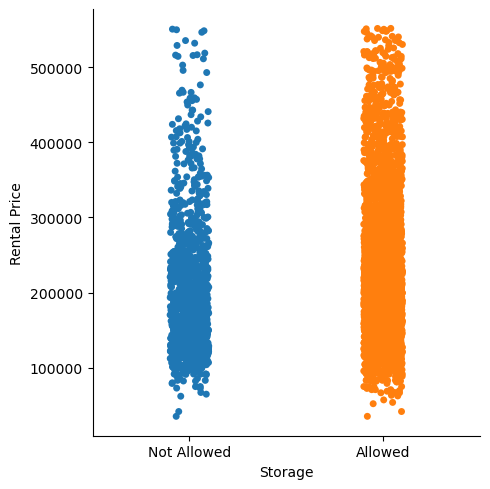

In [97]:
sns.catplot(x = 'Storage', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. more population of storage allowed available - rental price reaches above 500000
            2. less population of storage not allowed

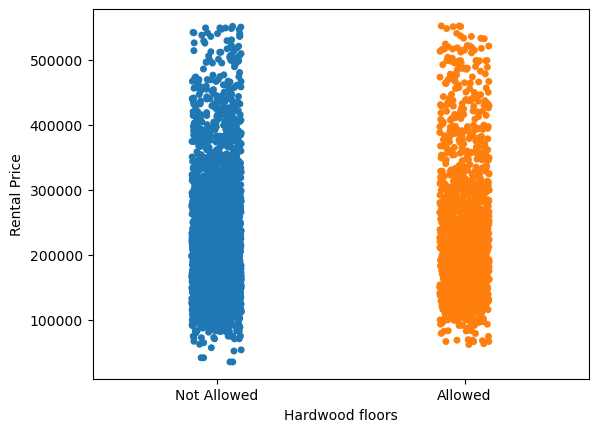

In [98]:
sns.stripplot(x = 'Hardwood floors', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. more population of Hardwood floors not allowed - rental price reaches above 500000
            2. less population of Hardwood floors allowed

## For Numerical Data Plotting

In [99]:
num_col

['Rental Price', 'Deposit ', 'no of bed', 'no of bathroom', 'Area']

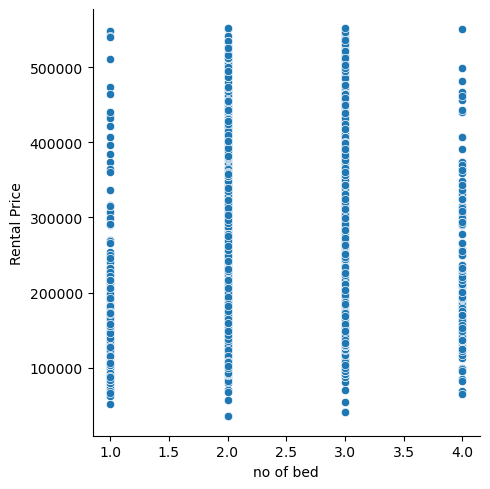

In [100]:
sns.relplot(x = 'no of bed', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. no of bed 3 and 3 has more rental price

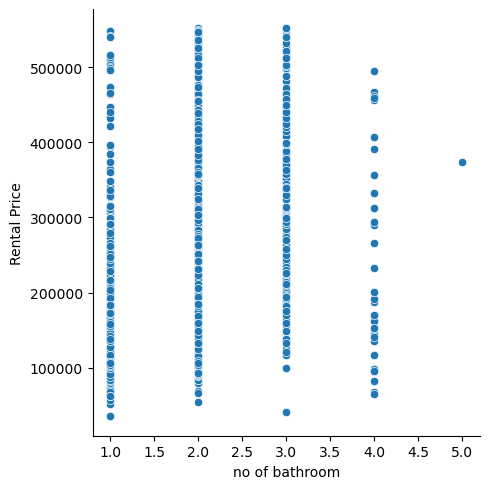

In [101]:
sns.relplot(x = 'no of bathroom', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. no of bathroom 2 has more rental price

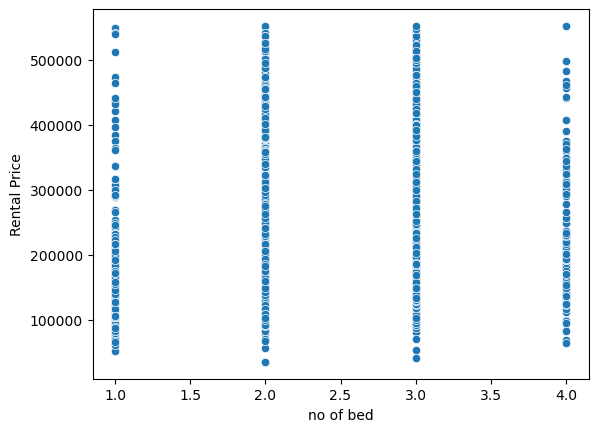

In [105]:
sns.scatterplot(x = 'no of bed', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. no of bed 2 and 3 are more  and its rental price reaches above 500000 

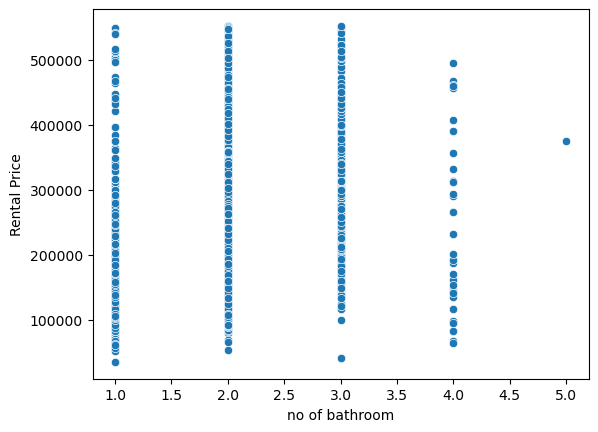

In [107]:
sns.scatterplot(x = 'no of bathroom', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. no of bathroom 2 are more and its rental price reaches above 500000 

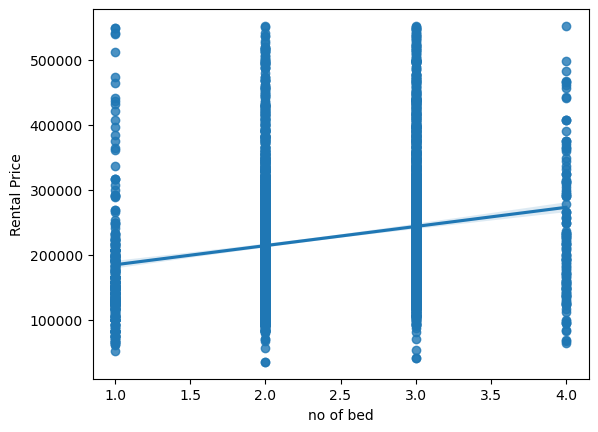

In [108]:
sns.regplot(x = 'no of bed', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. when no of bed is 5 or any number given we can predict the Rental Price

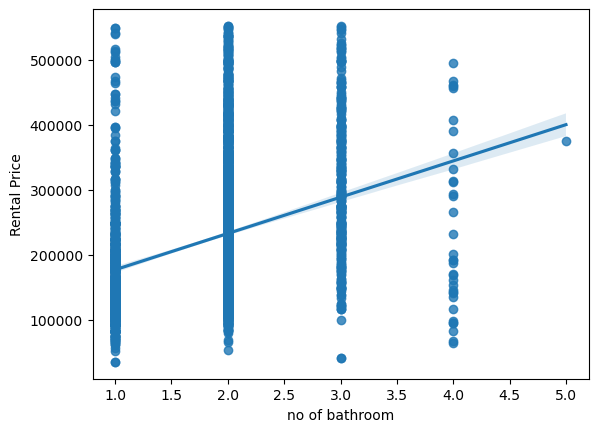

In [109]:
sns.regplot(x = 'no of bathroom', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. when no of bathroom is 9 or any number given we can predict the Rental Price

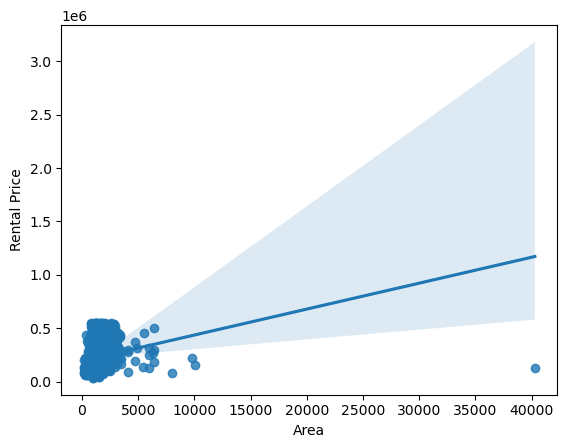

In [110]:
sns.regplot(x = 'Area', y = 'Rental Price', data = RealEstate_df)
plt.show()

Observation: 
            1. when Area is 40000 or any number given we can predict the Rental Price

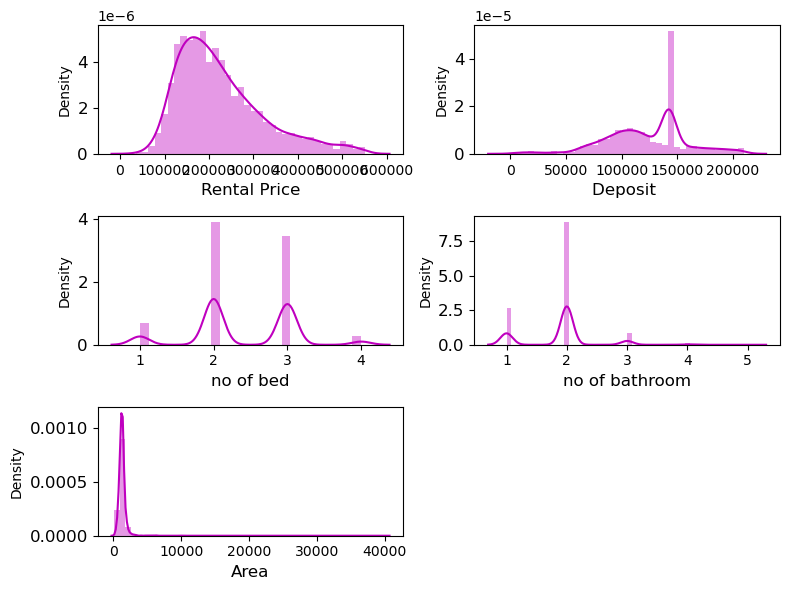

In [113]:
# Visualizing distribution of the data - numerical column

plt.figure(figsize=(8, 6))
p = 1
for i in num_col:
    if p <= 5:
        ax = plt.subplot(3, 2, p)
        sns.distplot(RealEstate_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data are not well normally distributed. 

## Histplot - to understand the range and frequency of 'Rental Prices'

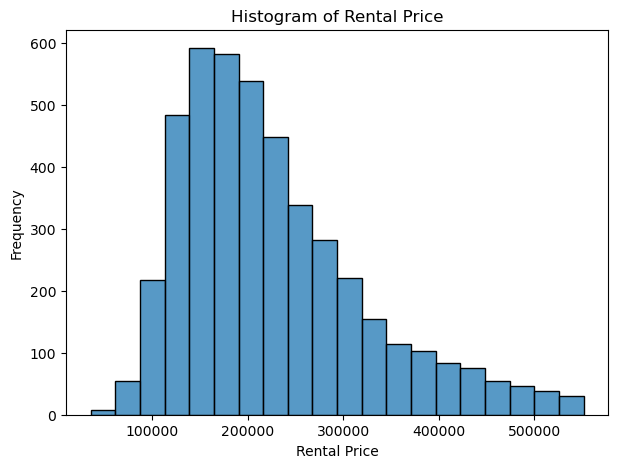

In [114]:
plt.figure(figsize = (7, 5))
sns.histplot(RealEstate_df['Rental Price'], bins = 20)  
plt.title('Histogram of Rental Price')
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.show()

Observation:
            1. the range is between 50000 to 500000

## Histplot - to understand the range and frequency of 'Area'

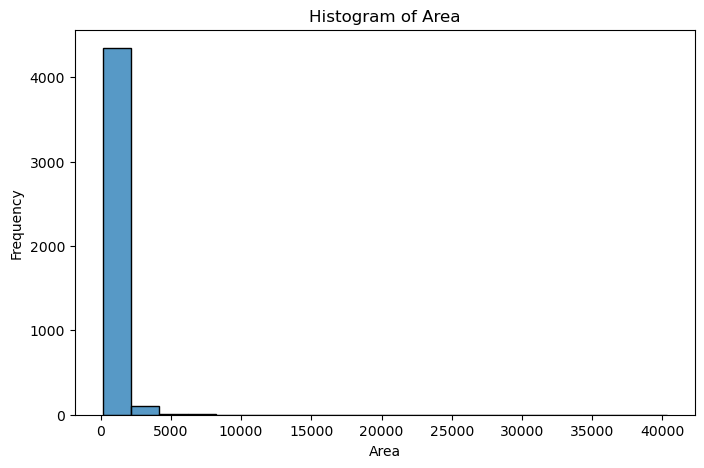

In [115]:
plt.figure(figsize = (8, 5))
sns.histplot(data = RealEstate_df, x = 'Area', bins = 20)
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

Observation:
            1. the range is between 0 to almost 8000

## Histplot - to understand the range and frequency of 'Deposit'

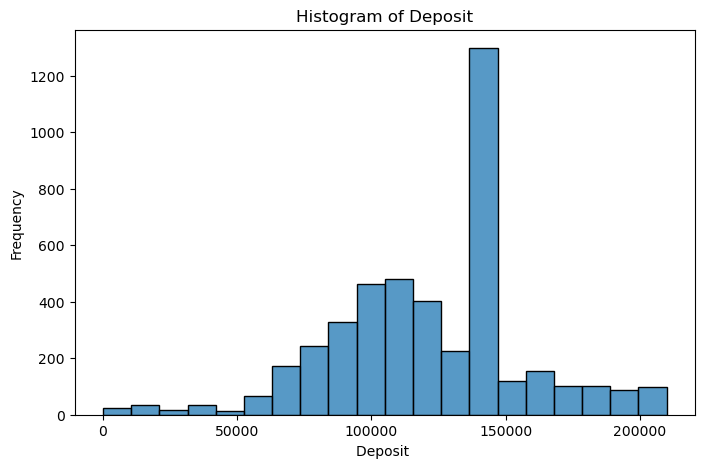

In [116]:
plt.figure(figsize = (8, 5))
sns.histplot(data = RealEstate_df, x = 'Deposit ', bins = 20)
plt.title('Histogram of Deposit')
plt.xlabel('Deposit ')
plt.ylabel('Frequency')
plt.show()

Observation:
            1. the range is between 0 to 200000

## Average Rental Price v/s City

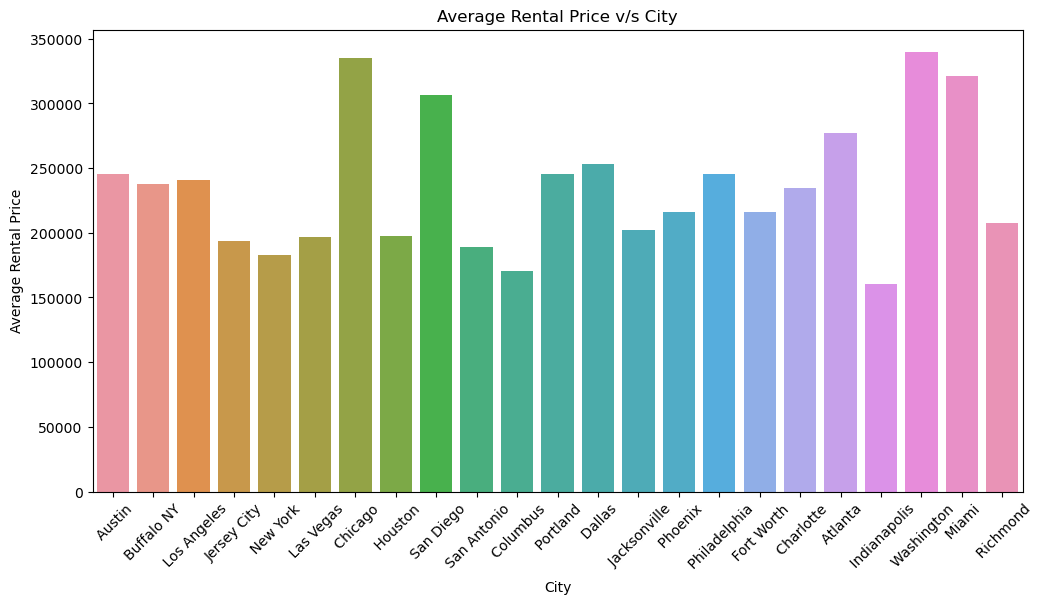

In [117]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'City', y = 'Rental Price', data = RealEstate_df, ci = None)  
plt.title('Average Rental Price v/s City')
plt.xlabel('City')
plt.ylabel('Average Rental Price')
plt.xticks(rotation=45)
plt.show()

Observation:
            1. Chicago and Washington has Average rental price above 400000
            2. Indianapolis and Columbus has less avarage renatl price around 170000 

## Top 10 - Average Rental Price v/s City 

In [118]:
avg_rental_price = RealEstate_df.groupby('City')['Rental Price'].mean().reset_index()

avg_rental_price = avg_rental_price.sort_values(by = 'Rental Price', ascending = False)

top_cities = 10  
top_avg_rental_price = avg_rental_price.head(top_cities)

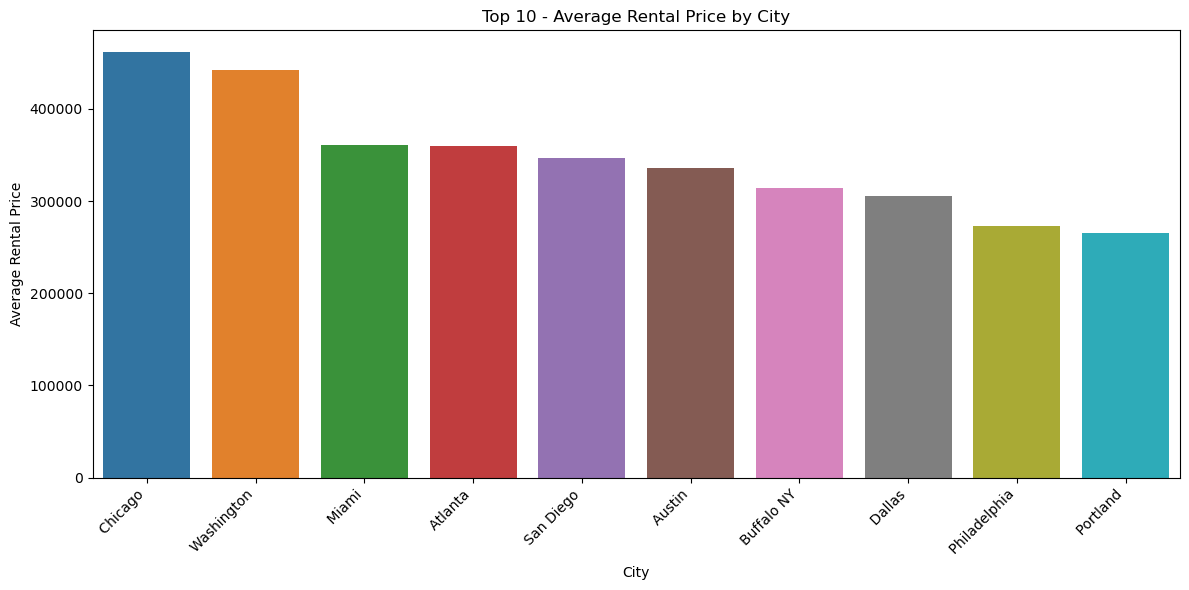

In [844]:
plt.figure(figsize = (12, 6))
sns.barplot(data = top_avg_rental_price, x = 'City', y = 'Rental Price')
plt.xticks(rotation = 45, ha ='right')  
plt.title('Top 10 - Average Rental Price by City')
plt.xlabel('City')
plt.ylabel('Average Rental Price')
plt.tight_layout()
plt.show()

Observation:
            1. Top 10 cities v/s Average Rental Price

## Top 6 - Average Rental Price v/s City 

In [119]:
top_cities = 6 
top_avg_rental_price = avg_rental_price.head(top_cities)

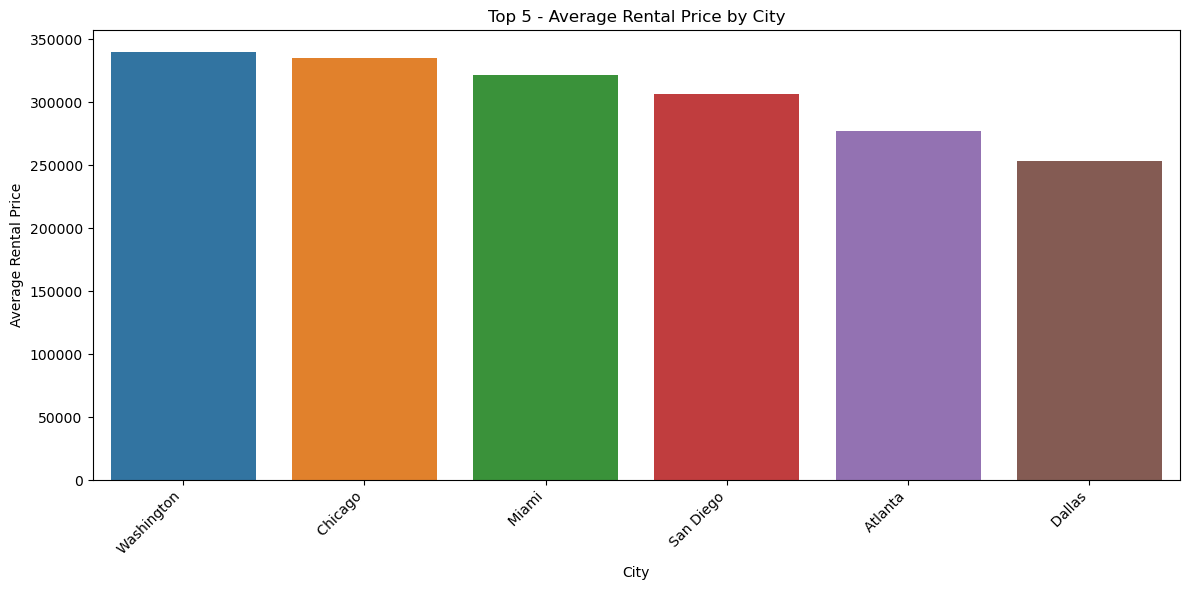

In [120]:
plt.figure(figsize = (12, 6))
sns.barplot(data = top_avg_rental_price, x = 'City', y = 'Rental Price')
plt.xticks(rotation = 45, ha ='right')  
plt.title('Top 5 - Average Rental Price by City')
plt.xlabel('City')
plt.ylabel('Average Rental Price')
plt.tight_layout()
plt.show()

Observation:
            1. Top 06 cities v/s Average Rental Price

## Rental Price v/s Area

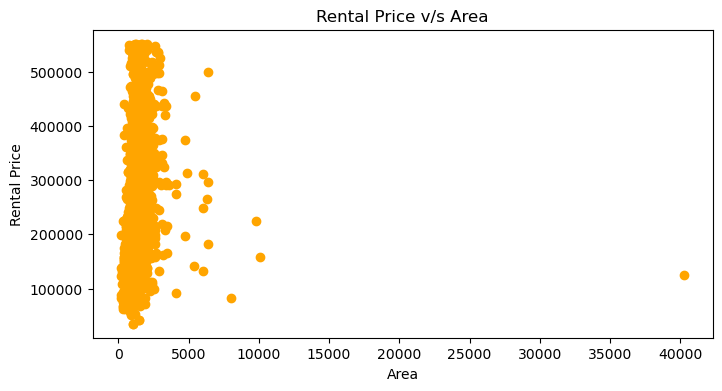

In [121]:
plt.figure(figsize = (8, 4))
plt.scatter(RealEstate_df['Area'], RealEstate_df['Rental Price'], color = 'orange')
plt.title('Rental Price v/s Area')
plt.xlabel('Area')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. the most area range is within 5000 sqft
            2. there is no linear relationship between these variables

## Rental Price v/s Deposit

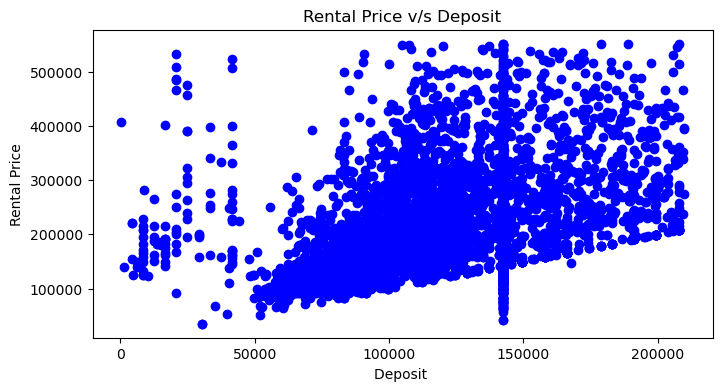

In [122]:
plt.figure(figsize = (8, 4))
plt.scatter(RealEstate_df['Deposit '], RealEstate_df['Rental Price'], color = 'blue')
plt.title('Rental Price v/s Deposit')
plt.xlabel('Deposit ')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. the most deposit range is between o to 200000

In [123]:
RealEstate_df.columns

Index(['City', 'Rental Price', 'Deposit ', 'no of bed', 'no of bathroom',
       'Area', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

## Rental Price v/s Pets Allowed

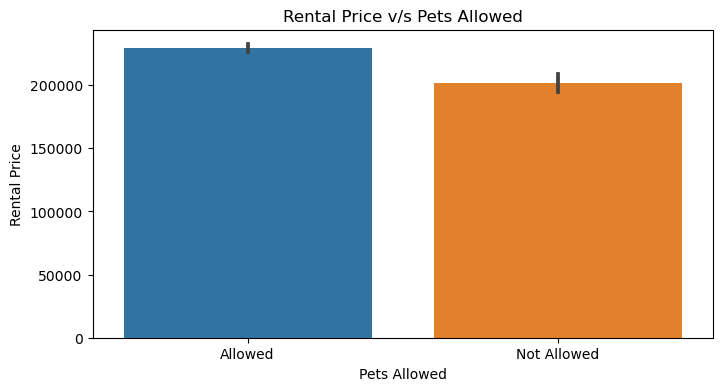

In [124]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'Pets Allowed', y = 'Rental Price', data = RealEstate_df)
plt.title('Rental Price v/s Pets Allowed')
plt.xlabel('Pets Allowed')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. rental price by pets allowed is above 200000

## Rental Price v/s Parking

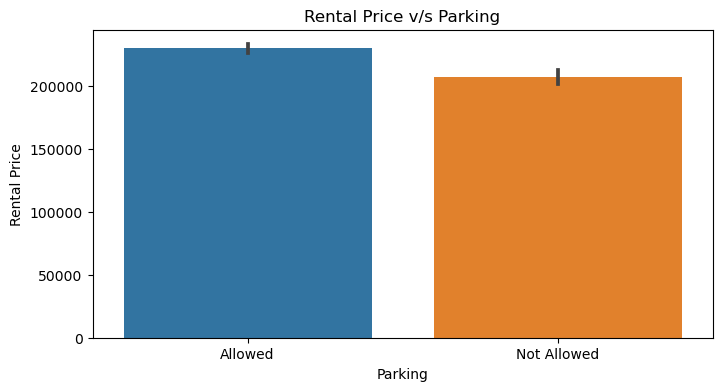

In [125]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'Parking', y = 'Rental Price', data = RealEstate_df)
plt.title('Rental Price v/s Parking')
plt.xlabel('Parking')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. Rental price by Parking is above 200000

## Rental Price v/s Roofdeck

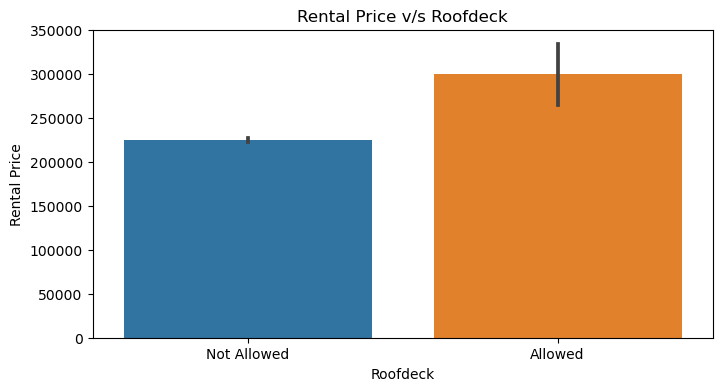

In [126]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'Roofdeck', y = 'Rental Price', data = RealEstate_df)
plt.title('Rental Price v/s Roofdeck')
plt.xlabel('Roofdeck')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. Rental price by Roofdeck is almost 300000

## Rental Price v/s Dishwasher

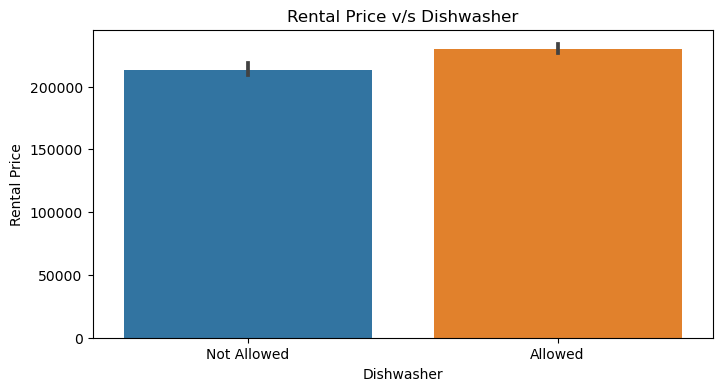

In [127]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'Dishwasher', y = 'Rental Price', data = RealEstate_df)
plt.title('Rental Price v/s Dishwasher')
plt.xlabel('Dishwasher')
plt.ylabel('Rental Price')
plt.show()

Observation:
            1. Rental price by Dishwasher is above 200000

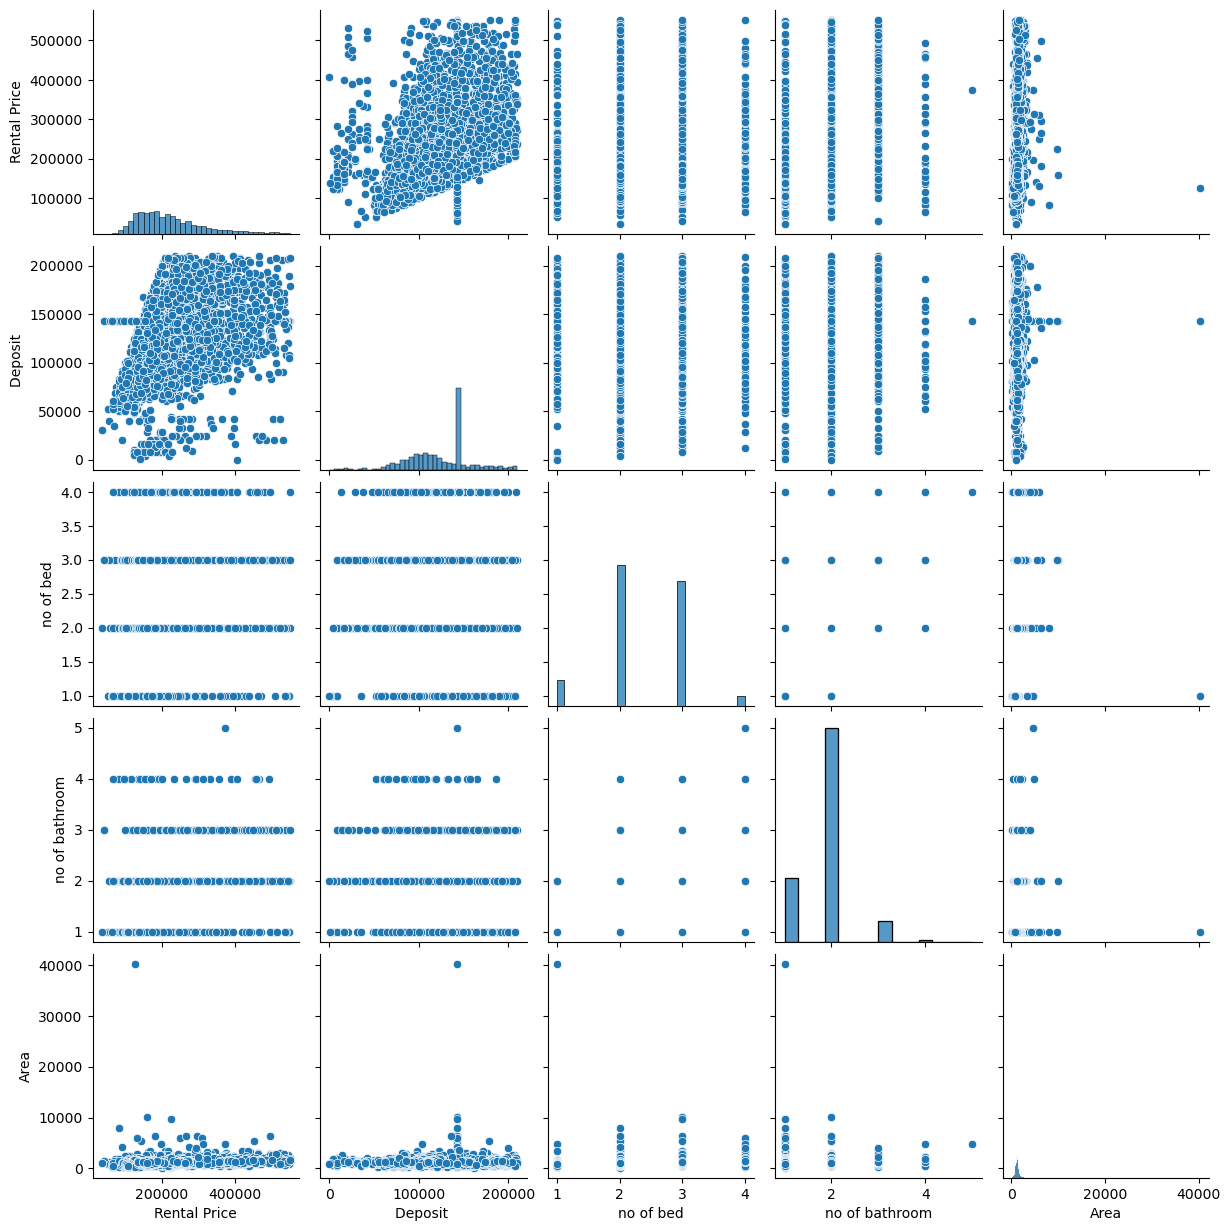

In [128]:
sns.pairplot(RealEstate_df[num_col])
plt.show()

Observation:
            1. There are no proper linear relationships between any of these features.

## End of Data Visualization

## Feature Encoding

In [129]:
RealEstate_df.shape

(4470, 15)

In [130]:
# Convert Object data type to int type

RealEstate_df.dtypes

City                object
Rental Price         int64
Deposit            float64
no of bed            int64
no of bathroom       int64
Area                 int64
Pets Allowed        object
Washer/Dryer        object
Air Conditioner     object
Parking             object
Fireplace           object
Dishwasher          object
Hardwood floors     object
Roofdeck            object
Storage             object
dtype: object

In [131]:
RealEstate_df.columns

Index(['City', 'Rental Price', 'Deposit ', 'no of bed', 'no of bathroom',
       'Area', 'Pets Allowed', 'Washer/Dryer', 'Air Conditioner', 'Parking',
       'Fireplace', 'Dishwasher', 'Hardwood floors', 'Roofdeck', 'Storage'],
      dtype='object')

In [132]:
cat_col

['City',
 'Pets Allowed',
 'Washer/Dryer',
 'Air Conditioner',
 'Parking',
 'Fireplace',
 'Dishwasher',
 'Hardwood floors',
 'Roofdeck',
 'Storage']

In [133]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [134]:
for i in cat_col:
    RealEstate_df[i] = label_enc.fit_transform(RealEstate_df[i])

In [135]:
RealEstate_df.dtypes

City                 int32
Rental Price         int64
Deposit            float64
no of bed            int64
no of bathroom       int64
Area                 int64
Pets Allowed         int32
Washer/Dryer         int32
Air Conditioner      int32
Parking              int32
Fireplace            int32
Dishwasher           int32
Hardwood floors      int32
Roofdeck             int32
Storage              int32
dtype: object

Observation:
            1. Converted all Object data type to int type

## End of Feature Encoding

## Correlation Analysis

In [136]:
# Check for Multicollinearity

# get coefficient of one variable with all the other variables

cor = RealEstate_df.corr()
cor

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
City,1.000000,-0.044407,0.241927,-0.149245,-0.315702,-0.013931,0.426294,0.334054,0.069982,0.106484,0.109708,0.108772,0.076948,-0.048302,-0.132996
Rental Price,-0.044407,1.000000,0.344304,0.208351,0.313559,0.191794,-0.099741,-0.137480,-0.030264,-0.091517,0.024193,-0.075910,-0.068378,-0.071554,-0.112883
Deposit,0.241927,0.344304,1.000000,-0.087291,-0.083029,0.029804,0.215359,0.251417,0.043786,0.122541,0.128897,0.106093,0.027029,-0.006350,-0.130409
no of bed,-0.149245,0.208351,-0.087291,1.000000,0.527424,0.270128,-0.204427,-0.261942,0.005980,-0.134951,-0.082984,-0.145297,-0.036371,0.029525,0.077346
no of bathroom,-0.315702,0.313559,-0.083029,0.527424,1.000000,0.201178,-0.386197,-0.355503,-0.053054,-0.161669,-0.112624,-0.175485,-0.108129,-0.021548,0.085302
Area,-0.013931,0.191794,0.029804,0.270128,0.201178,1.000000,0.025596,-0.065392,0.085337,-0.057019,-0.029163,-0.064515,-0.022488,0.006385,-0.030002
Pets Allowed,0.426294,-0.099741,0.215359,-0.204427,-0.386197,0.025596,1.000000,0.511330,0.086922,0.192503,0.090295,0.238503,0.160052,0.038176,-0.166655
Washer/Dryer,0.334054,-0.137480,0.251417,-0.261942,-0.355503,-0.065392,0.511330,1.000000,-0.045989,0.308327,0.145272,0.380109,0.054065,0.040049,-0.109993
Air Conditioner,0.069982,-0.030264,0.043786,0.005980,-0.053054,0.085337,0.086922,-0.045989,1.000000,-0.008235,0.034324,0.172068,0.100609,-0.014437,0.049455
Parking,0.106484,-0.091517,0.122541,-0.134951,-0.161669,-0.057019,0.192503,0.308327,-0.008235,1.000000,0.128262,0.286524,0.158655,0.002916,0.062884


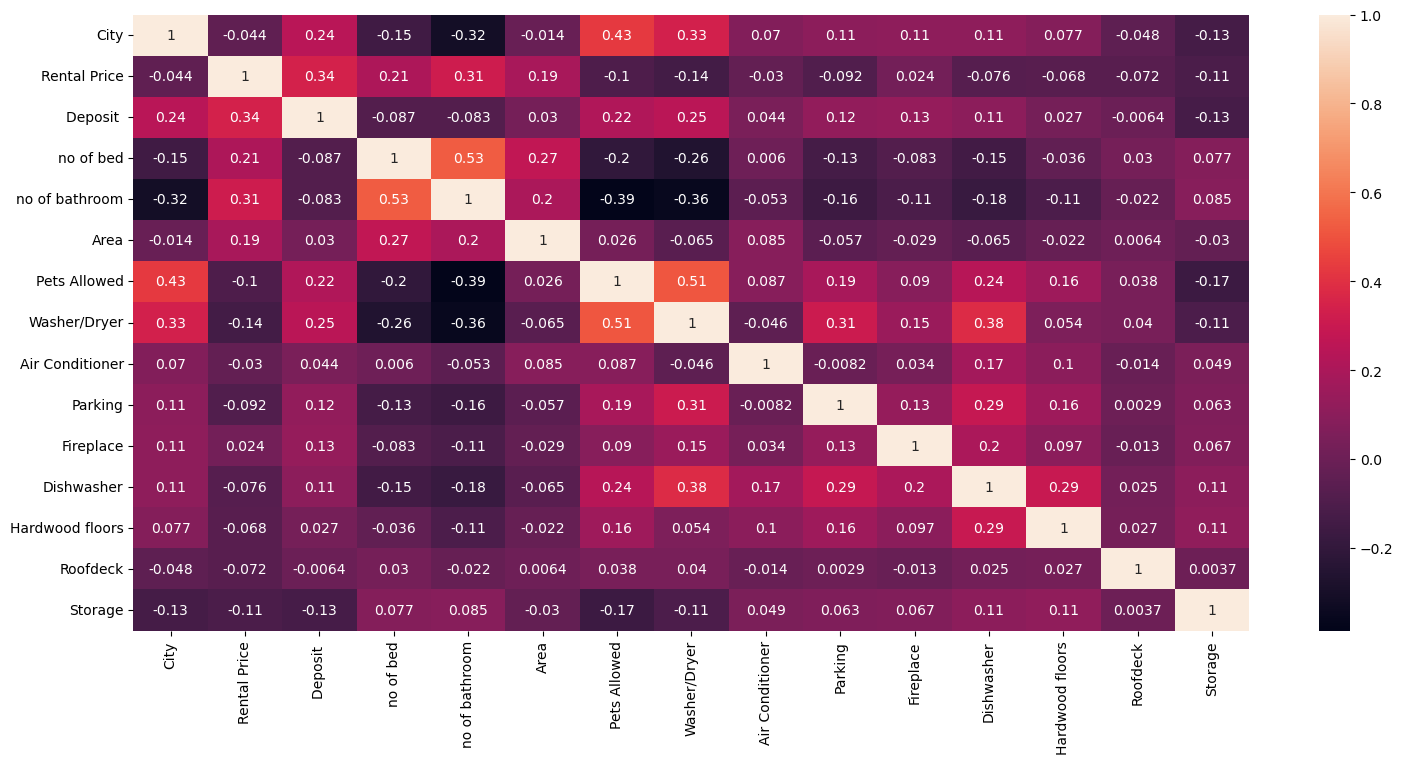

In [137]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. features are not positively correlated.

## Checking for Skewness

In [138]:
RealEstate_df.skew() # not in the range -0.5 to +0.5

City                0.241276
Rental Price        1.049150
Deposit            -0.235954
no of bed          -0.103218
no of bathroom      0.244617
Area               30.717494
Pets Allowed        2.051286
Washer/Dryer        1.916339
Air Conditioner     2.971765
Parking             1.566753
Fireplace          -1.220558
Dishwasher          1.027425
Hardwood floors    -0.733137
Roofdeck          -10.568782
Storage             1.169628
dtype: float64

Observations: 
            1. Ignore output labels and categorical variables skewness values 
            2. No skewness in numerical column - Deposit, no of bed, no of bathroom.

## Seperating Features and Target

In [139]:
RealEstate_df.shape

(4470, 15)

In [140]:
# Seperate features and labels

x = RealEstate_df.drop(['Rental Price'], axis = 1)
y = RealEstate_df['Rental Price']

In [141]:
x.shape

(4470, 14)

In [142]:
y.shape

(4470,)

In [143]:
y

0       170812
1       182199
2       275210
3       450095
4       423496
         ...  
4465    241464
4466    182365
4467    185358
4468    168650
4469    159341
Name: Rental Price, Length: 4470, dtype: int64

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [144]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-1.37485806, -2.26349566,  0.87809545, ...,  0.6985814 ,
         0.09381698,  1.74296884],
       [-1.37485806,  0.56460444,  0.87809545, ..., -1.4314724 ,
         0.09381698, -0.57373372],
       [-1.37485806,  0.56460444, -0.57564035, ...,  0.6985814 ,
         0.09381698, -0.57373372],
       ...,
       [ 0.97410275, -1.04131039,  0.87809545, ..., -1.4314724 ,
         0.09381698,  1.74296884],
       [ 0.97410275, -0.33360692,  0.87809545, ...,  0.6985814 ,
         0.09381698, -0.57373372],
       [ 0.97410275,  0.23441824, -0.57564035, ...,  0.6985814 ,
         0.09381698,  1.74296884]])

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.336358,City
1,1.135025,Deposit
2,1.471744,no of bed
3,1.664376,no of bathroom
4,1.113987,Area
5,1.653931,Pets Allowed
6,1.748420,Washer/Dryer
7,1.082447,Air Conditioner
8,1.177340,Parking
9,1.074612,Fireplace


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we observe all features are < threshold value. 
               so there is not multicollinearity problem.

## End of Correlation Analysis

## End of Exploratory Data Analysis

## Machine Learning Model - To Predict the 'Rental Price'

In [146]:
RealEstate_df.shape

(4470, 15)

In [147]:
RealEstate_df.head()

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,170812,41560.000000,3,2,1428,0,0,0,0,1,1,1,1,1
1,1,182199,142537.024666,3,2,1386,0,0,0,0,0,0,0,1,0
2,1,275210,142537.024666,2,2,1216,0,0,0,0,1,0,1,1,0
3,1,450095,142537.024666,2,2,1256,0,0,0,0,1,0,1,1,0
4,1,423496,142537.024666,2,2,1142,0,0,0,0,1,0,1,1,0


In [148]:
# creating train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Random Forest Regression

## Train the model

In [149]:
RFR = RandomForestRegressor()
RFR.fit(x_train_2, y_train_2)

RandomForestRegressor()

## Get Important features - To overcome Overfitting problem

In [150]:
imp_features = RFR.feature_importances_

In [151]:
imp_features_df = pd.DataFrame({'Feature': x.columns, 'Importance': imp_features})

In [152]:
imp_features_df = imp_features_df.sort_values(by = 'Importance', ascending = False)

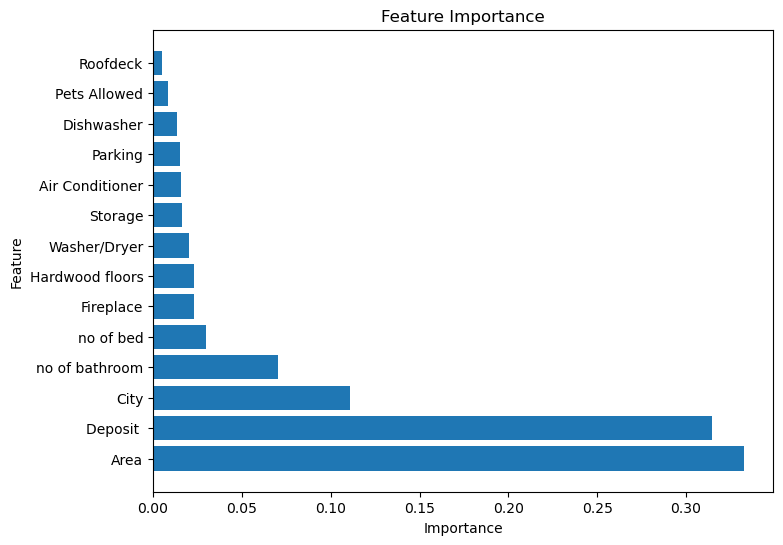

In [153]:
plt.figure(figsize = (8, 6))
plt.barh(imp_features_df['Feature'], imp_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [154]:
top = 9 

top_features = imp_features_df['Feature'][:top].tolist()

In [155]:
x_top1 = x[top_features]

In [156]:
x_top1.columns

Index(['Area', 'Deposit ', 'City', 'no of bathroom', 'no of bed', 'Fireplace',
       'Hardwood floors', 'Washer/Dryer', 'Storage'],
      dtype='object')

In [157]:
x_top1.shape

(4470, 9)

In [158]:
y.shape

(4470,)

In [159]:
# creating train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_top1, y, test_size = 0.25, random_state = 42)

In [160]:
RFR = RandomForestRegressor()
RFR.fit(x_train_2, y_train_2)

RandomForestRegressor()

## Perform Cross-Validation

In [161]:
kfold = KFold(n_splits = 5, shuffle = True)

In [162]:
RFR_scores1 = cross_val_score(RFR, x_train_2, y_train_2, cv = kfold, scoring = 'r2')
RFR_scores1

array([0.40754897, 0.43363448, 0.41747497, 0.42716849, 0.419388  ])

In [163]:
print(np.mean(RFR_scores1))

0.42104298096576886


## Make Predictions

In [164]:
# For Train Set

y_RFR_train_2 = RFR.predict(x_train_2)

In [165]:
y_RFR_train_2

array([240784.64511111, 333513.39      , 172006.86      , ...,
       145268.07      , 187177.86      , 150002.7       ])

In [166]:
# For Test Set

y_RFR_test_2 = RFR.predict(x_test_2)

In [167]:
y_RFR_test_2

array([284824.8 , 329643.17, 242175.16, ..., 201384.81, 239339.74,
       196308.92])

## Calculate performance metrics and error values

In [168]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_RFR_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_RFR_train_2)

r2_train = r2_score(y_train_2, y_RFR_train_2)

In [169]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  864320388.2793965
Train RMSE =  29399.326323563888
Train MAE =  20397.036023194465
Train R2 Score =  0.9071408361881231


In [170]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_RFR_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_RFR_test_2)

r2_test = r2_score(y_test_2, y_RFR_test_2)

In [171]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  5772280567.219285
Test RMSE =  75975.5261068937
Test MAE =  55665.992013235795
Test R2 Score =  0.41390513441964294


## Visualization - Predicted vs Actual values for Test Samples

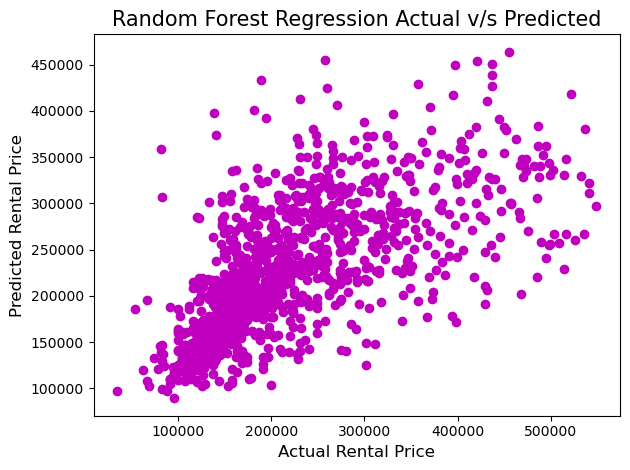

In [172]:
plt.scatter(y_test_2, y_RFR_test_2, color = 'm')
plt.xlabel("Actual Rental Price", fontsize = 12)
plt.ylabel('Predicted Rental Price', fontsize = 12)
plt.title('Random Forest Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation:
            1. Most of the samples are following linear curve

Observation:
            1. Random Forest Regression model Training samples - 90.71%
            2. Random Forest Regression model Testing samples - 41.39%

## Hyperparameter Tuning - Random Forest Regression

In [173]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [174]:
grid_search = GridSearchCV(RFR, param_grid, cv = 5, scoring = 'r2')

In [175]:
grid_search.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [176]:
best_params = grid_search.best_params_

In [177]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

## Retrain the Model

In [178]:
RFR_hyper_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)

In [179]:
RFR_hyper_model.fit(x_train_2, y_train_2)

RandomForestRegressor(max_depth=10, min_samples_leaf=2)

In [182]:
# Predict on the train data

y_RFR_hyper_train_2 = RFR_hyper_model.predict(x_train_2)

In [183]:
# Predict on the test data

y_RFR_hyper_test_2 = RFR_hyper_model.predict(x_test_2)

## Calculate performance metrics and error values

In [184]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_RFR_hyper_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_RFR_hyper_train_2)

r2_train = r2_score(y_train_2, y_RFR_hyper_train_2)

In [185]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  2897578253.771961
Train RMSE =  53829.15802585027
Train MAE =  38549.201283511786
Train R2 Score =  0.6886956534018894


In [186]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_RFR_hyper_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_RFR_hyper_test_2)

r2_test = r2_score(y_test_2, y_RFR_hyper_test_2)

In [187]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  5413978258.37859
Test RMSE =  73579.740814837
Test MAE =  54220.27808603278
Test R2 Score =  0.45028575401906124


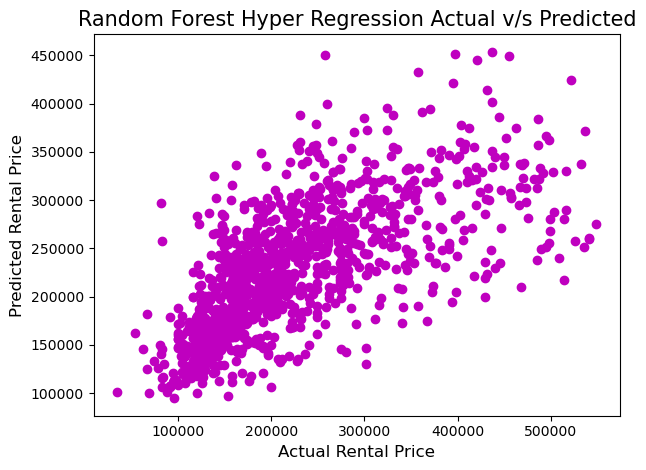

In [188]:
plt.scatter(y_test_2, y_RFR_hyper_test_2, color = 'm')
plt.xlabel("Actual Rental Price", fontsize = 12)
plt.ylabel('Predicted Rental Price', fontsize = 12)
plt.title('Random Forest Hyper Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation:
            1. Most of the samples are following linear curve

Observations:
            1. Random Forest Regression model with hyperparameter tuning Training samples - 68.86%
            2. Random Forest Regression model with hyperparameter tuning Testing samples - 45.02%

## Extra Trees Regressor

## Train the model

In [189]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train_2, y_train_2)

ExtraTreesRegressor()

## Perform Cross-Validation

In [190]:
kfold = KFold(n_splits = 5, shuffle = True)

In [191]:
ETR_scores1 = cross_val_score(ETR, x_train_2, y_train_2, cv = kfold, scoring = 'r2')
ETR_scores1

array([0.27420129, 0.3393541 , 0.39496813, 0.33242697, 0.33439231])

In [192]:
print(np.mean(ETR_scores1))

0.33506855771200134


## Make Predictions

In [193]:
y_ETR_train_2 = ETR.predict(x_train_2)

In [194]:
y_ETR_train_2.shape

(3352,)

In [195]:
y_ETR_test_2 = ETR.predict(x_test_2)

In [196]:
y_ETR_test_2.shape

(1118,)

## Calculate performance metrics and error values

In [197]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_ETR_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_ETR_train_2)

r2_train = r2_score(y_train_2, y_ETR_train_2)

In [198]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  141554128.11815435
Train RMSE =  11897.652210337734
Train MAE =  1544.658969769292
Train R2 Score =  0.9847919843735977


In [199]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_ETR_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_ETR_test_2)

r2_test = r2_score(y_test_2, y_ETR_test_2)

In [200]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  6506462784.196423
Test RMSE =  80662.64801130956
Test MAE =  57375.15175909363
Test R2 Score =  0.33935913431452414


Observations:
            1. Extra Tree Regression model Training samples - 98.47%
            2. Extra Tree Regression model Testing samples - 33.93%

In [201]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x_top1)

In [202]:
# creating train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [203]:
x_train_1.shape

(3352, 9)

In [204]:
y_train_1.shape

(3352,)

In [205]:
x_test_1.shape

(1118, 9)

In [206]:
y_test_1.shape

(1118,)

## Linear Regression

# Train the Model

In [207]:
model_LR = LinearRegression()
model_LR.fit(x_train_1, y_train_1)

LinearRegression()

## Perform Cross-Validation

In [208]:
kfold = KFold(n_splits = 5, shuffle = True)

In [209]:
LR_scores1 = cross_val_score(model_LR, x_train_1, y_train_1, cv = kfold, scoring = 'r2')
LR_scores1

array([ 0.31775281,  0.29376712,  0.2521703 ,  0.27414287, -0.02007087])

In [210]:
print(np.mean(LR_scores1))

0.22355244592067156


## Make Predictions

In [211]:
# For Train Set

y_LR_train_1 = model_LR.predict(x_train_1)

In [212]:
y_LR_train_1.shape

(3352,)

In [213]:
# For Test Set

y_LR_test_1 = model_LR.predict(x_test_1)

In [214]:
y_LR_test_1.shape

(1118,)

## Calculate performance metrics and error values

In [215]:
# For Train Set

mse_train = mean_squared_error(y_train_1, y_LR_train_1)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_1, y_LR_train_1)

r2_train = r2_score(y_train_1, y_LR_train_1)

In [216]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  6665696228.1680565
Train RMSE =  81643.71517862263
Train MAE =  61302.72316576188
Train R2 Score =  0.28386396252452895


In [217]:
# For Test Set

mse_test = mean_squared_error(y_test_1, y_LR_test_1)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_1, y_LR_test_1)

r2_test = r2_score(y_test_1, y_LR_test_1)

In [218]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  7326777261.11865
Test RMSE =  85596.59608371498
Test MAE =  64069.51053516728
Test R2 Score =  0.2560676003208874


## Visualization - Predicted vs Actual values for Test Samples

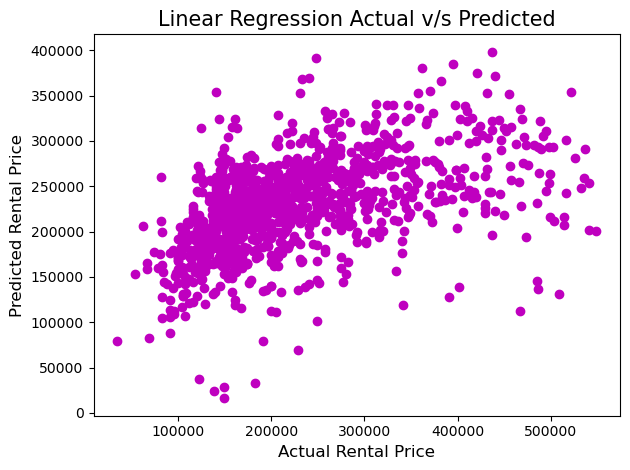

In [219]:
plt.scatter(y_test_1, y_LR_test_1, color = 'm')
plt.xlabel("Actual Rental Price", fontsize = 12)
plt.ylabel('Predicted Rental Price', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation: 1. Some of the samples are following linear curve

Observation:
            1. Linear Regression model Training samples - 28.38%
            2. Linear Regression model Testing samples - 25.60%

## KNN Regressor

In [220]:
from sklearn.neighbors import KNeighborsRegressor

In [221]:
kfold = KFold(n_splits = 5, shuffle = True)

In [222]:
knn = KNeighborsRegressor()

In [223]:
knn_scores1 = cross_val_score(knn, x_train_1, y_train_1, cv = kfold, scoring = 'r2')
knn_scores1

array([0.36533232, 0.24125165, 0.29027669, 0.31179644, 0.32143368])

In [224]:
knn.fit(x_train_1, y_train_1)

KNeighborsRegressor()

In [227]:
# For Train Set

y_knn_train_1 = knn.predict(x_train_1)

In [228]:
# For Test Set

y_knn_test_1 = knn.predict(x_test_1)

In [229]:
# For Train Set

mse_train = mean_squared_error(y_train_1, y_knn_train_1)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_1, y_knn_train_1)

r2_train = r2_score(y_train_1, y_knn_train_1)

In [230]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  4196369545.221886
Train RMSE =  64779.39136192842
Train MAE =  46881.47374701671
Train R2 Score =  0.5491586542455054


In [231]:
# For Test Set

mse_test = mean_squared_error(y_test_1, y_knn_test_1)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_1, y_knn_test_1)

r2_test = r2_score(y_test_1, y_knn_test_1)

In [232]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  6516430046.992666
Test RMSE =  80724.40800026139
Test MAE =  58787.42128801431
Test R2 Score =  0.33834709730753176


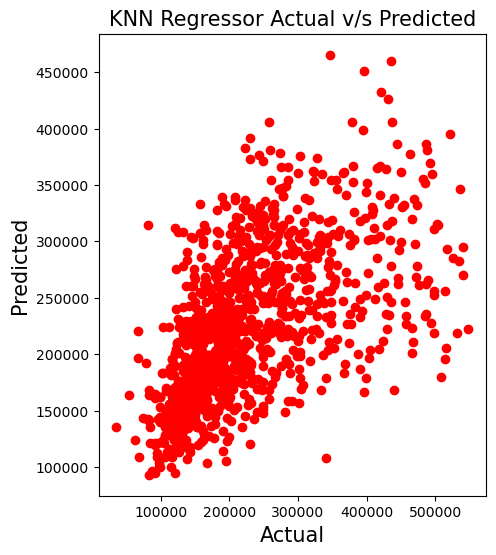

In [233]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test_1, y = y_knn_test_1, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

Observation:
            1. KNN Regression model for training samples - 54.91%
            2. KNN Regression model for testing samples - 33.83%

## XGBoost Regressor

In [244]:
import xgboost as xgb

In [245]:
xg = xgb.XGBRegressor()

In [246]:
xg.fit(x_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [248]:
y_train_xg = xg.predict(x_train_2)
y_test_xg = xg.predict(x_test_2)

In [250]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_train_xg)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_train_xg)

r2_train = r2_score(y_train_2, y_train_xg)

In [251]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  1253703479.5474117
Train RMSE =  35407.67543269978
Train MAE =  24000.193009770286
Train R2 Score =  0.8653070570155514


In [252]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_test_xg)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_test_xg)

r2_test = r2_score(y_test_2, y_test_xg)

In [253]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  6197785467.205559
Test RMSE =  78726.01518688444
Test MAE =  56791.47163426599
Test R2 Score =  0.37070102570436325


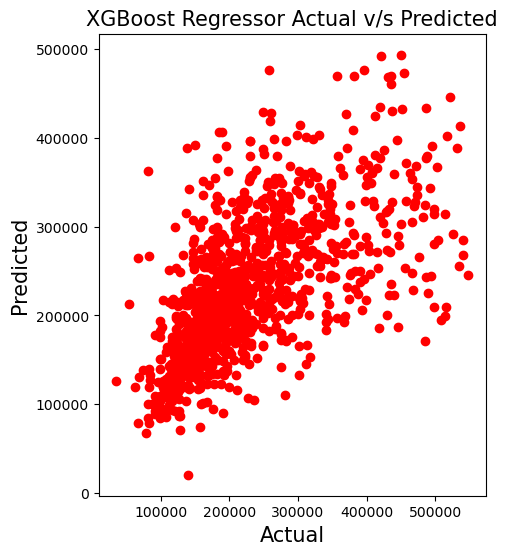

In [255]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test_2, y = y_test_xg, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('XGBoost Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. XGBoost Regressor model for training samples - 86.53%
            2. XGBoost Regressor model for testing samples - 37.07%

In [ ]:
Observation:
            1. Random Forest Regression model Training samples - 90.71%
            2. Random Forest Regression model Testing samples - 41.39%
            
            1. Random Forest Regression model with hyperparameter tuning Training samples - 68.86%
            2. Random Forest Regression model with hyperparameter tuning Testing samples - 45.02%
            
            1. Extra Tree Regression model Training samples - 98.47%
            2. Extra Tree Regression model Testing samples - 33.93%
            
            1. Linear Regression model Training samples - 28.38%
            2. Linear Regression model Testing samples - 25.60%
            
            1. KNN Regression model for training samples - 54.91%
            2. KNN Regression model for testing samples - 33.83%
            
            1. XGBoost Regressor model for training samples - 86.53%
            2. XGBoost Regressor model for testing samples - 37.07%

In [ ]:
Observations:
            Based on these results, here are some Observations:

        1. Random Forest Regression with hyperparameter tuning has a better testing performance 
            compared to the regular RFR, indicating that hyperparameter tuning 
            helped in generalization.
        2. Extra Tree Regression has very high training accuracy but poor testing accuracy - overfitting.
        3. Linear Regression has low performance on both training and testing data - underfitting.
        4. KNN Regression has from relatively low testing performance.
        5. XGBoost Regressor performs reasonably well, with high training accuracy and relatively 
            better testing accuracy compared to other models.

            Given these insights, the Random Forest Regression with hyperparameter tuning seems to 
            be a good balance between training and testing performance while avoiding 
            significant overfitting. 
            Therefore, I would choose this model for saving and predicting the 'Rental Prices'. 

## Saving the model

In [256]:
import pickle
filename = "RealEstate_Capstone_Project_Rental_Price_Prediction_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [257]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('RealEstate_Capstone_Project_Rental_Price_Prediction_Model.pkl', 'rb'))

In [258]:
r2_score(y_test_2, y_RFR_hyper_test_2)

0.45028575401906124

In [259]:
prediction = loaded_model1.predict(x_test_2)
prediction

array([284101.13373466, 337398.80829562, 241682.54235281, ...,
       194122.06380544, 254223.41622612, 184913.0927743 ])

## Comparing the predicted and actual values - 'Rental Price'

In [260]:
a = np.array(y_test_2)
df1 = pd.DataFrame()
df1['Predicted'] = prediction
df1['Original'] = a
df1

,Predicted,Original
0,284101.133735,306297
1,337398.808296,531968
2,241682.542353,399142
3,313356.426960,466469
4,228554.888089,274296
...,...,...
1113,432530.878158,357416
1114,135921.242341,211125
1115,194122.063805,124680
1116,254223.416226,241879


Observation:
            1.This RealEstate_Capstone_Project_Rental_Price_Prediction_Model.pkl can be used to 
              predict the 'Rental Price'.

## End of Machine Learning Model - Predict the 'Rental Price' 

## Machine Learning Model - Predict the 'Area'

In [309]:
RealEstate_df.shape

(4470, 15)

In [310]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,170812,41560.000000,3,2,1428,0,0,0,0,1,1,1,1,1
1,1,182199,142537.024666,3,2,1386,0,0,0,0,0,0,0,1,0
2,1,275210,142537.024666,2,2,1216,0,0,0,0,1,0,1,1,0
3,1,450095,142537.024666,2,2,1256,0,0,0,0,1,0,1,1,0
4,1,423496,142537.024666,2,2,1142,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,17,241464,122602.000000,2,2,1269,0,0,0,0,1,0,0,1,0
4466,17,182365,133656.960000,2,2,1091,0,0,0,0,1,0,1,1,0
4467,17,185358,85198.000000,3,2,1390,0,0,0,0,1,0,0,1,1
4468,17,168650,110466.480000,3,2,1230,0,0,0,0,1,0,1,1,0


Observation: 
            1. Predict the 'Area' is a continous data 
            2. This is a Regression problem. 
            3. The target is 'Area'

## Detecting Outliers

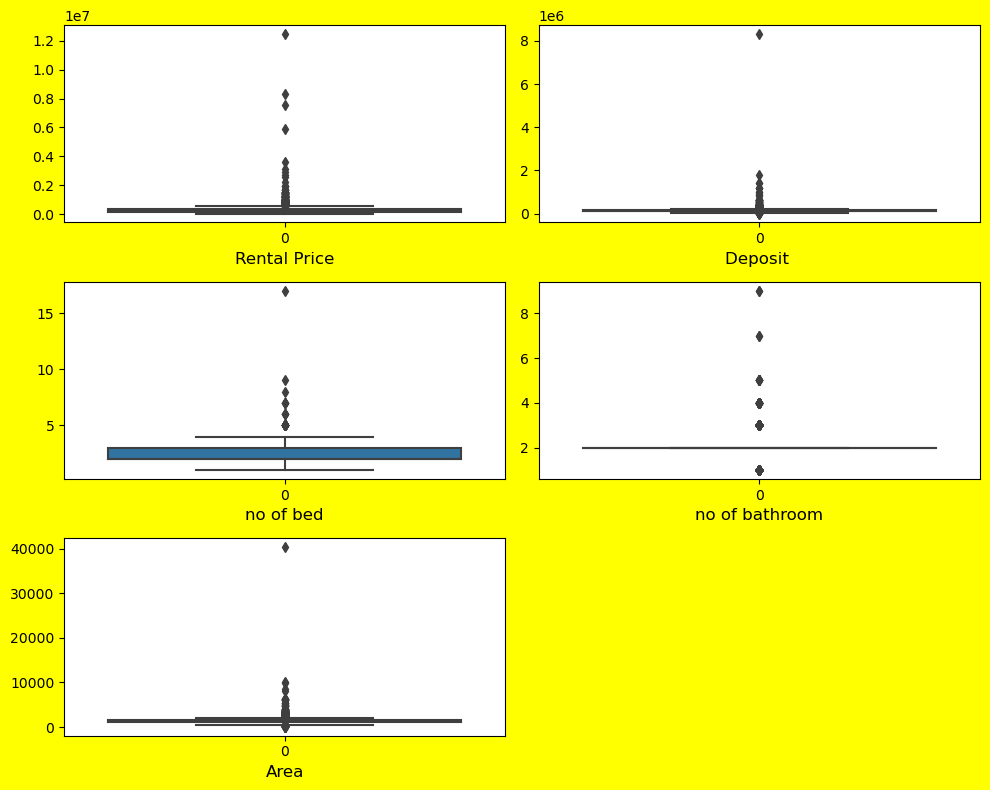

In [311]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,8), facecolor = 'yellow')
p = 1
for i in RealEstate_df_features:
    if p <= 5:
        ax = plt.subplot(3, 2, p)
        sns.boxplot(data = RealEstate_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations: 
            1. More Outliers are there in most of the features. 
            2. Outliers are left skewed (i.e. outliers are above max value) 
            3. Remove the outliers

## Find IQR to identify outliers and remove it

In [312]:
# there are situation we should remove outliers 

q1 = RealEstate_df.quantile(0.25)
q3 = RealEstate_df.quantile(0.75)
iqr = q3 - q1

In [313]:
# validating one outlier

Area_high = (q3['Area'] + (1.5 * iqr['Area']))
Area_high

# anything > 2049.0 outliers

2049.0

In [314]:
# check the index which have the higher values

np_index5 = np.where(RealEstate_df['Area'] > Area_high)
np_index5

# remove these indexes as they are outliers

(array([  14,   21,   61,   71,  161,  239,  247,  249,  250,  255,  258,
         259,  265,  268,  270,  287,  288,  289,  292,  295,  297,  304,
         308,  313,  316,  318,  326,  327,  331,  332,  333,  334,  337,
         342,  344,  348,  349,  380,  381,  388,  420,  422,  428,  465,
         483,  529,  558,  683,  754,  779,  818,  826,  888,  903, 1101,
        1118, 1119, 1225, 1397, 1402, 1410, 1512, 1555, 1609, 1618, 1636,
        1646, 1656, 1670, 1671, 1733, 1754, 1797, 1837, 1893, 1912, 1918,
        1945, 1973, 1978, 2025, 2098, 2140, 2162, 2203, 2205, 2246, 2259,
        2294, 2303, 2332, 2347, 2425, 2434, 2482, 2562, 2586, 2604, 2650,
        2657, 2659, 2677, 2721, 2735, 2742, 2752, 2781, 2805, 2814, 2829,
        2835, 2892, 2959, 3060, 3256, 3264, 3277, 3289, 3300, 3322, 3333,
        3344, 3397, 3499, 3527, 3602, 3609, 3625, 3649, 3668, 3671, 3673,
        3737, 3780, 3790, 3793, 3799, 3846, 3887, 3891, 3907, 3916, 3933,
        3952, 3956, 3957, 3964, 3968, 

In [315]:
RealEstate_df.shape

(4470, 15)

In [316]:
RealEstate_df = RealEstate_df.drop(RealEstate_df.index[np_index5])

In [317]:
RealEstate_df.shape

(4307, 15)

In [318]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,170812,41560.000000,3,2,1428,0,0,0,0,1,1,1,1,1
1,1,182199,142537.024666,3,2,1386,0,0,0,0,0,0,0,1,0
2,1,275210,142537.024666,2,2,1216,0,0,0,0,1,0,1,1,0
3,1,450095,142537.024666,2,2,1256,0,0,0,0,1,0,1,1,0
4,1,423496,142537.024666,2,2,1142,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465,17,241464,122602.000000,2,2,1269,0,0,0,0,1,0,0,1,0
4466,17,182365,133656.960000,2,2,1091,0,0,0,0,1,0,1,1,0
4467,17,185358,85198.000000,3,2,1390,0,0,0,0,1,0,0,1,1
4468,17,168650,110466.480000,3,2,1230,0,0,0,0,1,0,1,1,0


In [319]:
RealEstate_df.reset_index(inplace = True, drop = True)

In [320]:
RealEstate_df

,City,Rental Price,Deposit,no of bed,no of bathroom,Area,Pets Allowed,Washer/Dryer,Air Conditioner,Parking,Fireplace,Dishwasher,Hardwood floors,Roofdeck,Storage
0,1,170812,41560.000000,3,2,1428,0,0,0,0,1,1,1,1,1
1,1,182199,142537.024666,3,2,1386,0,0,0,0,0,0,0,1,0
2,1,275210,142537.024666,2,2,1216,0,0,0,0,1,0,1,1,0
3,1,450095,142537.024666,2,2,1256,0,0,0,0,1,0,1,1,0
4,1,423496,142537.024666,2,2,1142,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,17,241464,122602.000000,2,2,1269,0,0,0,0,1,0,0,1,0
4303,17,182365,133656.960000,2,2,1091,0,0,0,0,1,0,1,1,0
4304,17,185358,85198.000000,3,2,1390,0,0,0,0,1,0,0,1,1
4305,17,168650,110466.480000,3,2,1230,0,0,0,0,1,0,1,1,0


## Seperating Features and Target

In [321]:
RealEstate_df.shape

(4307, 15)

In [322]:
# Seperate features and labels

x1 = RealEstate_df.drop(['Area'], axis = 1)
y1 = RealEstate_df['Area']

In [323]:
x1.shape

(4307, 14)

In [324]:
y1.shape

(4307,)

## Get Important features - To overcome Overfitting problem

In [325]:
# creating train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [326]:
RFR = RandomForestRegressor()
RFR.fit(x_train_2, y_train_2)

RandomForestRegressor()

In [327]:
imp_features = RFR.feature_importances_

In [328]:
imp_features_df = pd.DataFrame({'Feature': x1.columns, 'Importance': imp_features})

In [329]:
imp_features_df = imp_features_df.sort_values(by = 'Importance', ascending = False)

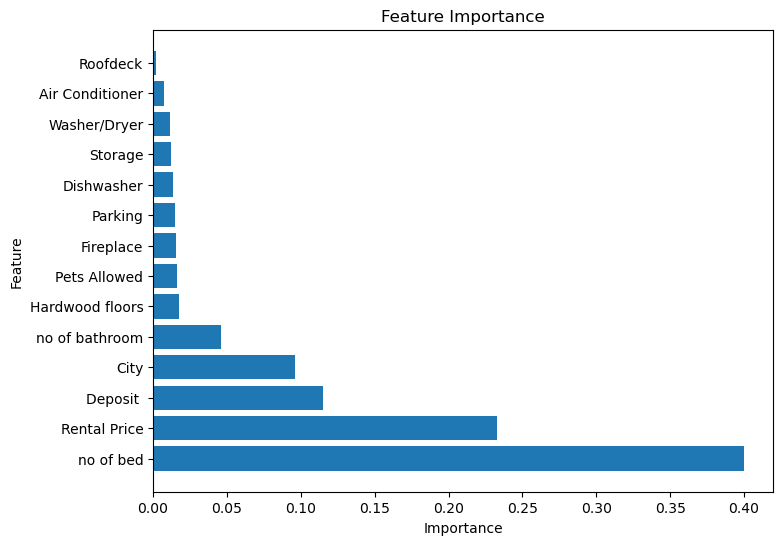

In [330]:
plt.figure(figsize = (8, 6))
plt.barh(imp_features_df['Feature'], imp_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [331]:
top = 9 

top_features = imp_features_df['Feature'][:top].tolist()

In [332]:
x_top2 = x1[top_features]

In [333]:
x_top2.columns

Index(['no of bed', 'Rental Price', 'Deposit ', 'City', 'no of bathroom',
       'Hardwood floors', 'Pets Allowed', 'Fireplace', 'Parking'],
      dtype='object')

In [334]:
x_top2.shape

(4307, 9)

In [335]:
y.shape

(4470,)

In [341]:
# creating train_test_split

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_top2, y1, test_size = 0.25, random_state = 42)

In [342]:
RFR = RandomForestRegressor()
RFR.fit(x_train_2, y_train_2)

RandomForestRegressor()

## Perform Cross-Validation

In [343]:
kfold = KFold(n_splits = 5, shuffle = True)

In [344]:
RFR_scores1 = cross_val_score(RFR, x_train_2, y_train_2, cv = kfold, scoring = 'r2')
RFR_scores1

array([0.50381185, 0.50844016, 0.44922636, 0.55384843, 0.57594752])

In [345]:
print(np.mean(RFR_scores1))

0.5182548615715382


In [346]:
# For Train Set

y_RFR_train_2 = RFR.predict(x_train_2)

In [347]:
# For Test Set

y_RFR_test_2 = RFR.predict(x_test_2)

In [349]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_RFR_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_RFR_train_2)

r2_train = r2_score(y_train_2, y_RFR_train_2)

In [350]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  7207.6069380088
Train RMSE =  84.89762622128372
Train MAE =  60.762331630052955
Train R2 Score =  0.925169472484181


In [351]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_RFR_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_RFR_test_2)

r2_test = r2_score(y_test_2, y_RFR_test_2)

In [352]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  47327.18465018441
Test RMSE =  217.54812030947178
Test MAE =  162.12836567293738
Test R2 Score =  0.5389992733580048


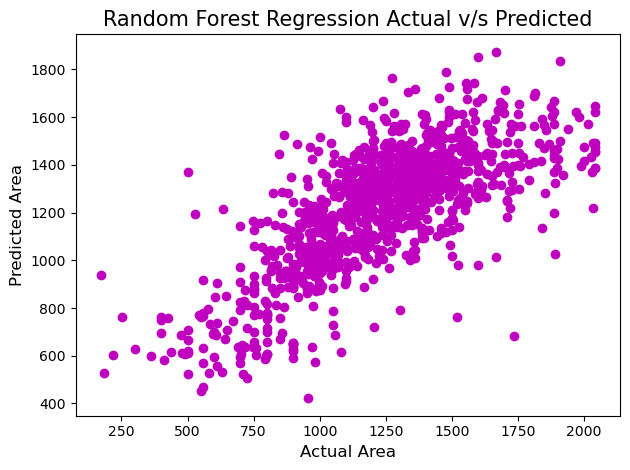

In [354]:
plt.scatter(y_test_2, y_RFR_test_2, color = 'm')
plt.xlabel("Actual Area", fontsize = 12)
plt.ylabel('Predicted Area', fontsize = 12)
plt.title('Random Forest Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation:
            1. Most of the samples are following linear curve

Observation: 
            1. Random Forest Regression model Training samples - 92.51% 
            2. Random Forest Regression model Testing samples - 53.89%

## Hyperparameter Tuning - Random Forest Regression

In [355]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [356]:
grid_search = GridSearchCV(RFR, param_grid, cv = 5, scoring = 'r2')

In [357]:
grid_search.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [359]:
best_params = grid_search.best_params_

In [360]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

## Retrain the Model

In [361]:
RFR_hyper_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100)

In [362]:
RFR_hyper_model.fit(x_train_2, y_train_2)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [363]:
# Predict on the train data

y_RFR_hyper_train_2 = RFR_hyper_model.predict(x_train_2)

In [364]:
# Predict on the test data

y_RFR_hyper_test_2 = RFR_hyper_model.predict(x_test_2)

In [365]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_RFR_hyper_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_RFR_hyper_train_2)

r2_train = r2_score(y_train_2, y_RFR_hyper_train_2)

In [366]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  26886.32554097222
Train RMSE =  163.9705020452527
Train MAE =  122.16140289099216
Train R2 Score =  0.7208618698970275


In [367]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_RFR_hyper_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_RFR_hyper_test_2)

r2_test = r2_score(y_test_2, y_RFR_hyper_test_2)

In [368]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  45309.251989311975
Test RMSE =  212.85970024716275
Test MAE =  157.33863128847028
Test R2 Score =  0.5586553849533347


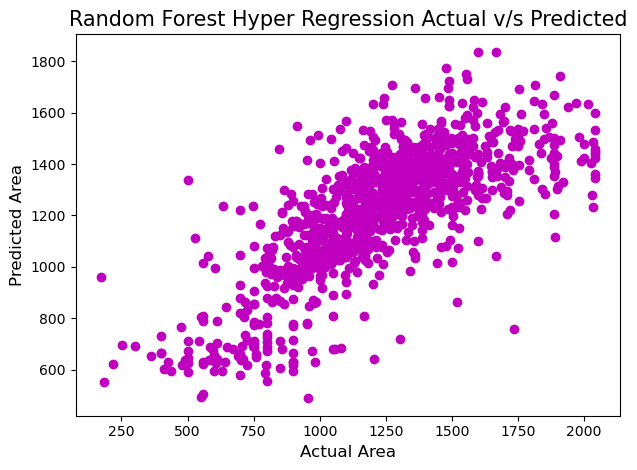

In [369]:
plt.scatter(y_test_2, y_RFR_hyper_test_2, color = 'm')
plt.xlabel("Actual Area", fontsize = 12)
plt.ylabel('Predicted Area', fontsize = 12)
plt.title('Random Forest Hyper Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation:
            1. Most of the samples are following linear curve

Observations:
            1. Random Forest Regression model with hyperparameter tuning Training samples - 72.08%
            2. Random Forest Regression model with hyperparameter tuning Testing samples - 55.86%

## Extra Trees Regressor

In [370]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train_2, y_train_2)

ExtraTreesRegressor()

In [371]:
kfold = KFold(n_splits = 5, shuffle = True)

In [372]:
ETR_scores1 = cross_val_score(ETR, x_train_2, y_train_2, cv = kfold, scoring = 'r2')
ETR_scores1

array([0.43374331, 0.46204999, 0.45413845, 0.48002624, 0.44338048])

In [373]:
print(np.mean(ETR_scores1))

0.4546676965741511


In [374]:
y_ETR_train_2 = ETR.predict(x_train_2)

In [375]:
y_ETR_test_2 = ETR.predict(x_test_2)

In [376]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_ETR_train_2)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_ETR_train_2)

r2_train = r2_score(y_train_2, y_ETR_train_2)

In [377]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  832.1006486805248
Train RMSE =  28.846154833539337
Train MAE =  3.908241191213328
Train R2 Score =  0.9913609980368573


In [378]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_ETR_test_2)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_ETR_test_2)

r2_test = r2_score(y_test_2, y_ETR_test_2)

In [379]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  53835.24135865473
Test RMSE =  232.0242258012183
Test MAE =  171.5385831454216
Test R2 Score =  0.4756061327389708


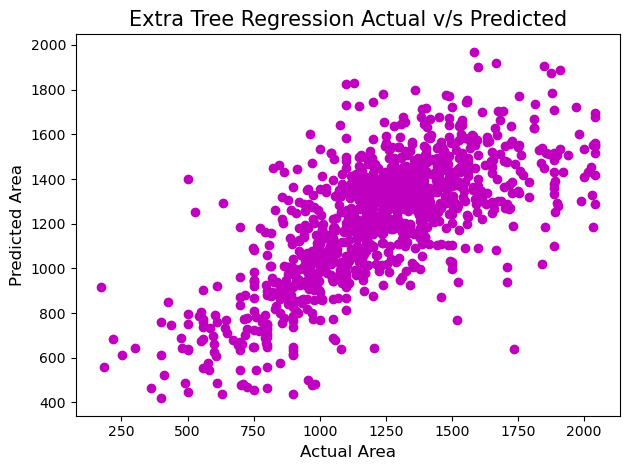

In [423]:
plt.scatter(y_test_2, y_ETR_test_2, color = 'm')
plt.xlabel("Actual Area", fontsize = 12)
plt.ylabel('Predicted Area', fontsize = 12)
plt.title('Extra Tree Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observations:
            1. Extra Tree Regression model Training samples - 99.13%
            2. Extra Tree Regression model Testing samples - 47.56%

In [380]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x_top2)

In [382]:
# creating train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_scaled, y1, test_size = 0.25, random_state = 42)

In [383]:
x_train_1.shape

(3230, 9)

In [384]:
y_train_1.shape

(3230,)

In [385]:
x_test_1.shape

(1077, 9)

In [386]:
y_test_1.shape

(1077,)

## Linear Regression

In [387]:
model_LR = LinearRegression()
model_LR.fit(x_train_1, y_train_1)

LinearRegression()

In [388]:
kfold = KFold(n_splits = 5, shuffle = True)

In [389]:
LR_scores1 = cross_val_score(model_LR, x_train_1, y_train_1, cv = kfold, scoring = 'r2')
LR_scores1

array([0.43227145, 0.44211928, 0.46659668, 0.45638915, 0.48788562])

In [390]:
print(np.mean(LR_scores1))

0.45705243511669263


In [391]:
# For Train Set

y_LR_train_1 = model_LR.predict(x_train_1)

In [392]:
# For Test Set

y_LR_test_1 = model_LR.predict(x_test_1)

In [393]:
# For Train Set

mse_train = mean_squared_error(y_train_1, y_LR_train_1)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_1, y_LR_train_1)

r2_train = r2_score(y_train_1, y_LR_train_1)

In [394]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  51619.327796172765
Train RMSE =  227.19887278807693
Train MAE =  168.64549582925966
Train R2 Score =  0.46407988640031084


In [395]:
# For Test Set

mse_test = mean_squared_error(y_test_1, y_LR_test_1)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_1, y_LR_test_1)

r2_test = r2_score(y_test_1, y_LR_test_1)

In [396]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  56099.66256286237
Test RMSE =  236.8536733151132
Test MAE =  177.5034737188679
Test R2 Score =  0.4535490459234508


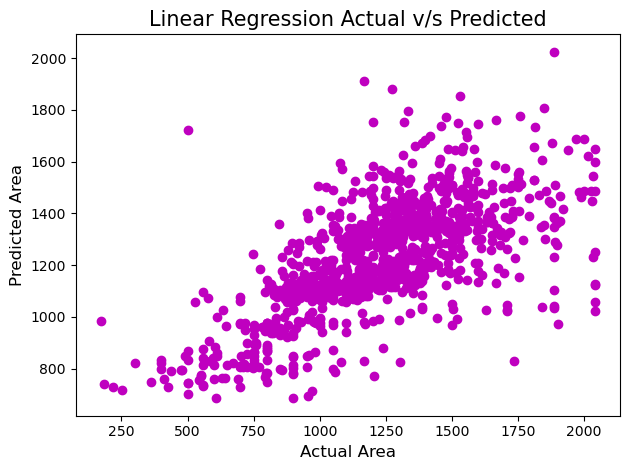

In [398]:
plt.scatter(y_test_1, y_LR_test_1, color = 'm')
plt.xlabel("Actual Area", fontsize = 12)
plt.ylabel('Predicted Area', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize = 15)
plt.tight_layout()

Observation: 
            1. Most of the samples are following linear curve

Observation:
            1. Linear Regression model Training samples - 46.40%
            2. Linear Regression model Testing samples - 45.35%

## KNN Regressor

In [399]:
kfold = KFold(n_splits = 5, shuffle = True)

In [400]:
knn = KNeighborsRegressor()

In [401]:
knn_scores1 = cross_val_score(knn, x_train_1, y_train_1, cv = kfold, scoring = 'r2')
knn_scores1

array([0.48870656, 0.47316625, 0.42686201, 0.48645084, 0.48162829])

In [402]:
knn.fit(x_train_1, y_train_1)

KNeighborsRegressor()

In [403]:
# For Train Set

y_knn_train_1 = knn.predict(x_train_1)

In [404]:
# For Test Set

y_knn_test_1 = knn.predict(x_test_1)

In [405]:
# For Train Set

mse_train = mean_squared_error(y_train_1, y_knn_train_1)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_1, y_knn_train_1)

r2_train = r2_score(y_train_1, y_knn_train_1)

In [406]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  32687.857077399385
Train RMSE =  180.79783482497623
Train MAE =  134.03981424148606
Train R2 Score =  0.6606294419907357


In [407]:
# For Test Set

mse_test = mean_squared_error(y_test_1, y_knn_test_1)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_1, y_knn_test_1)

r2_test = r2_score(y_test_1, y_knn_test_1)

In [408]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  54932.46937790157
Test RMSE =  234.3767679995216
Test MAE =  174.11550603528318
Test R2 Score =  0.4649183447815102


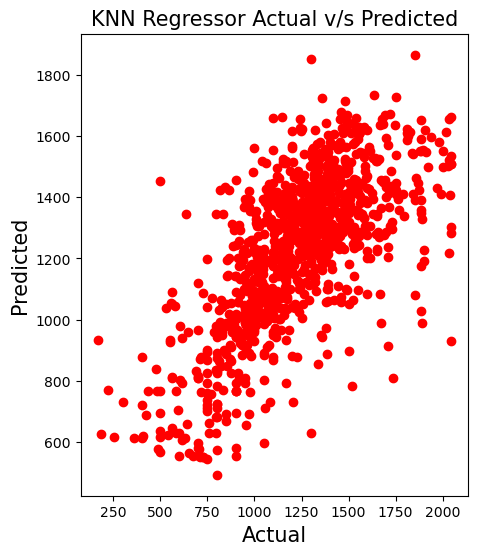

In [409]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test_1, y = y_knn_test_1, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

Observation:
            1. KNN Regression model for training samples - 66.06%
            2. KNN Regression model for testing samples - 46.49%

## XGBoost Regressor

In [410]:
xg = xgb.XGBRegressor()

In [411]:
xg.fit(x_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [412]:
y_train_xg = xg.predict(x_train_2)
y_test_xg = xg.predict(x_test_2)

In [413]:
# For Train Set

mse_train = mean_squared_error(y_train_2, y_train_xg)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_train_2, y_train_xg)

r2_train = r2_score(y_train_2, y_train_xg)

In [414]:
print("Train MSE = ", mse_train)

print("Train RMSE = ", rmse_train)

print("Train MAE = ", mae_train)

print("Train R2 Score = ", r2_train)

Train MSE =  9787.838470868868
Train RMSE =  98.9335052996146
Train MAE =  69.02597154552353
Train R2 Score =  0.8983810962065187


In [415]:
# For Test Set

mse_test = mean_squared_error(y_test_2, y_test_xg)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test_2, y_test_xg)

r2_test = r2_score(y_test_2, y_test_xg)

In [416]:
print("Test MSE = ", mse_test)

print("Test RMSE = ", rmse_test)

print("Test MAE = ", mae_test)

print("Test R2 Score = ", r2_test)

Test MSE =  49451.11886314893
Test RMSE =  222.3760752939689
Test MAE =  165.20904302995518
Test R2 Score =  0.5183106306095793


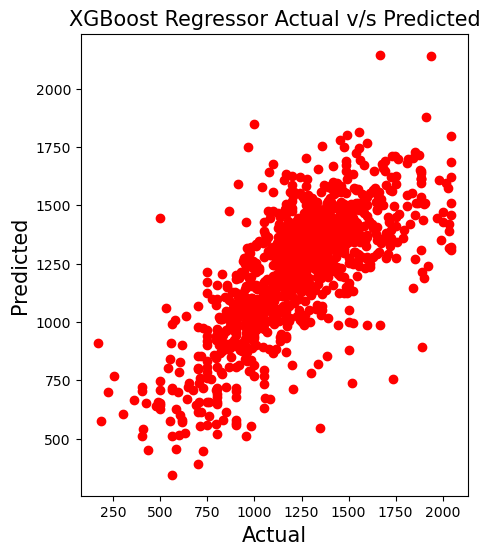

In [417]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test_2, y = y_test_xg, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('XGBoost Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. XGBoost Regressor model for training samples - 89.83%
            2. XGBoost Regressor model for testing samples - 51.83%

Observation:
            1. Random Forest Regression model Training samples - 92.51%
            2. Random Forest Regression model Testing samples - 53.89%
            
            1. Random Forest Regression model with hyperparameter tuning Training samples - 72.08%
            2. Random Forest Regression model with hyperparameter tuning Testing samples - 55.86%
            
            1. Extra Tree Regression model Training samples - 99.13%
            2. Extra Tree Regression model Testing samples - 47.56%
            
            1. Linear Regression model Training samples - 46.40%
            2. Linear Regression model Testing samples - 45.35%
            
            1. KNN Regression model for training samples - 66.06%
            2. KNN Regression model for testing samples - 46.49%
            
            1. XGBoost Regressor model for training samples - 89.83%
            2. XGBoost Regressor model for testing samples - 51.83%

Observations:
            Based on these results, here are some considerations:

1. Random Forest Regression with hyperparameter tuning has a slightly better testing performance compared to the regular RFR, indicating that hyperparameter tuning helped in generalization.
2. Extra Tree Regression has very high training accuracy but lower testing accuracy - overfitting.
3. Linear Regression has relatively low performance on both training and testing data - underfitting.
4. KNN Regression and XGBoost Regressor perform reasonably well, with moderate testing accuracy.

Given these insights, the Random Forest Regression with hyperparameter tuning seems to perform the best, with a good balance between training and testing performance. 

Therefore, I would choose this model for saving and predicting the 'Area'. 

## Saving the model

In [418]:
import pickle
filename = "RealEstate_Capstone_Project_Area_Prediction_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [419]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('RealEstate_Capstone_Project_Area_Prediction_Model.pkl', 'rb'))

In [420]:
r2_score(y_test_2, y_RFR_hyper_test_2)

0.5586553849533347

In [421]:
prediction = loaded_model1.predict(x_test_2)
prediction

array([1417.50861519, 1222.72600052,  869.50593727, ..., 1242.19973304,
       1034.35900386, 1308.59297703])

## Comparing the predicted and actual values - 'Area'

In [422]:
a = np.array(y_test_2)
df1 = pd.DataFrame()
df1['Predicted'] = prediction
df1['Original'] = a
df1

,Predicted,Original
0,1417.508615,1410
1,1222.726001,1183
2,869.505937,975
3,1474.994779,1386
4,1721.641868,1490
...,...,...
1072,1244.754115,1368
1073,1432.127907,1205
1074,1242.199733,1104
1075,1034.359004,1216


Observation:
            1.This RealEstate_Capstone_Project_Area_Prediction_Model.pkl can be used to 
              predict the 'Area'
            2. Almost actual and predicted values match

## End of Machine Learning Model - Predict the 'Area'